# Import Libraries

In [1]:
#Data cleaning and manipulation libraries
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import missingno as msno
from datetime import date
from dateutil.relativedelta import relativedelta

#Data Viz Libraries
##basic
import matplotlib.pyplot as plt
import seaborn as sns

#Display set-up
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
sns.axes_style("darkgrid")


##advanced
import gif
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')
from fbprophet import Prophet

# Set global visualisation settings
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('precision', 2)
font_size = 17

<h2>Import datasets</h2>

In [2]:
df= pd.read_csv('Data/london_monthly_data.csv', parse_dates = ['date'])
df1 = pd.read_csv('Data/london_annual_data.csv')

In [3]:
display(df.head())
display(df1.head())

,area,average_price,code,borough_flag,houses_sold,date
0,City of London,"91,448.98",E09000001,1,17.00,1995-01-01
1,City of London,"82,202.77",E09000001,1,7.00,1995-02-01
2,City of London,"79,120.70",E09000001,1,14.00,1995-03-01
3,City of London,"77,101.21",E09000001,1,7.00,1995-04-01
4,City of London,"84,409.15",E09000001,1,10.00,1995-05-01


,code,date,area,borough_flag,average_price,houses_sold,age,no_males,no_females,dwellings_per_hect,no_dwellings,Recycling_Rates,life,anxiouos,happy,worth,total_hourly_pay,male_hourly_pay,female_hourly_pay
0,E09000020,2015,Kensington & Chelsea,1,"1,302,102.72",181.50,36.00,"1,578.00","1,504.00",69.88,"86,537.00",25.00,7.65,3.21,7.40,7.79,nan,nan,nan
1,E09000020,2015,Kensington & Chelsea,1,"1,302,102.72",181.50,37.00,"1,637.00","1,360.00",69.88,"86,537.00",25.00,7.65,3.21,7.40,7.79,nan,nan,nan
2,E09000020,2015,Kensington & Chelsea,1,"1,302,102.72",181.50,38.00,"1,504.00","1,376.00",69.88,"86,537.00",25.00,7.65,3.21,7.40,7.79,nan,nan,nan
3,E09000020,2015,Kensington & Chelsea,1,"1,302,102.72",181.50,39.00,"1,345.00","1,283.00",69.88,"86,537.00",25.00,7.65,3.21,7.40,7.79,nan,nan,nan
4,E09000020,2015,Kensington & Chelsea,1,"1,302,102.72",181.50,40.00,"1,153.00","1,204.00",69.88,"86,537.00",25.00,7.65,3.21,7.40,7.79,nan,nan,nan


In [4]:
display(df.describe());

,average_price,borough_flag,houses_sold
count,"14,355.00","14,355.00","14,265.00"
mean,"275,571.53",0.73,"3,833.97"
std,"195,404.10",0.44,"11,974.11"
min,"40,722.42",0.00,2.00
25%,"137,258.72",0.00,240.00
50%,"229,194.75",1.00,365.00
75%,"363,471.86",1.00,"2,981.00"
max,"1,463,377.92",1.00,"132,163.00"


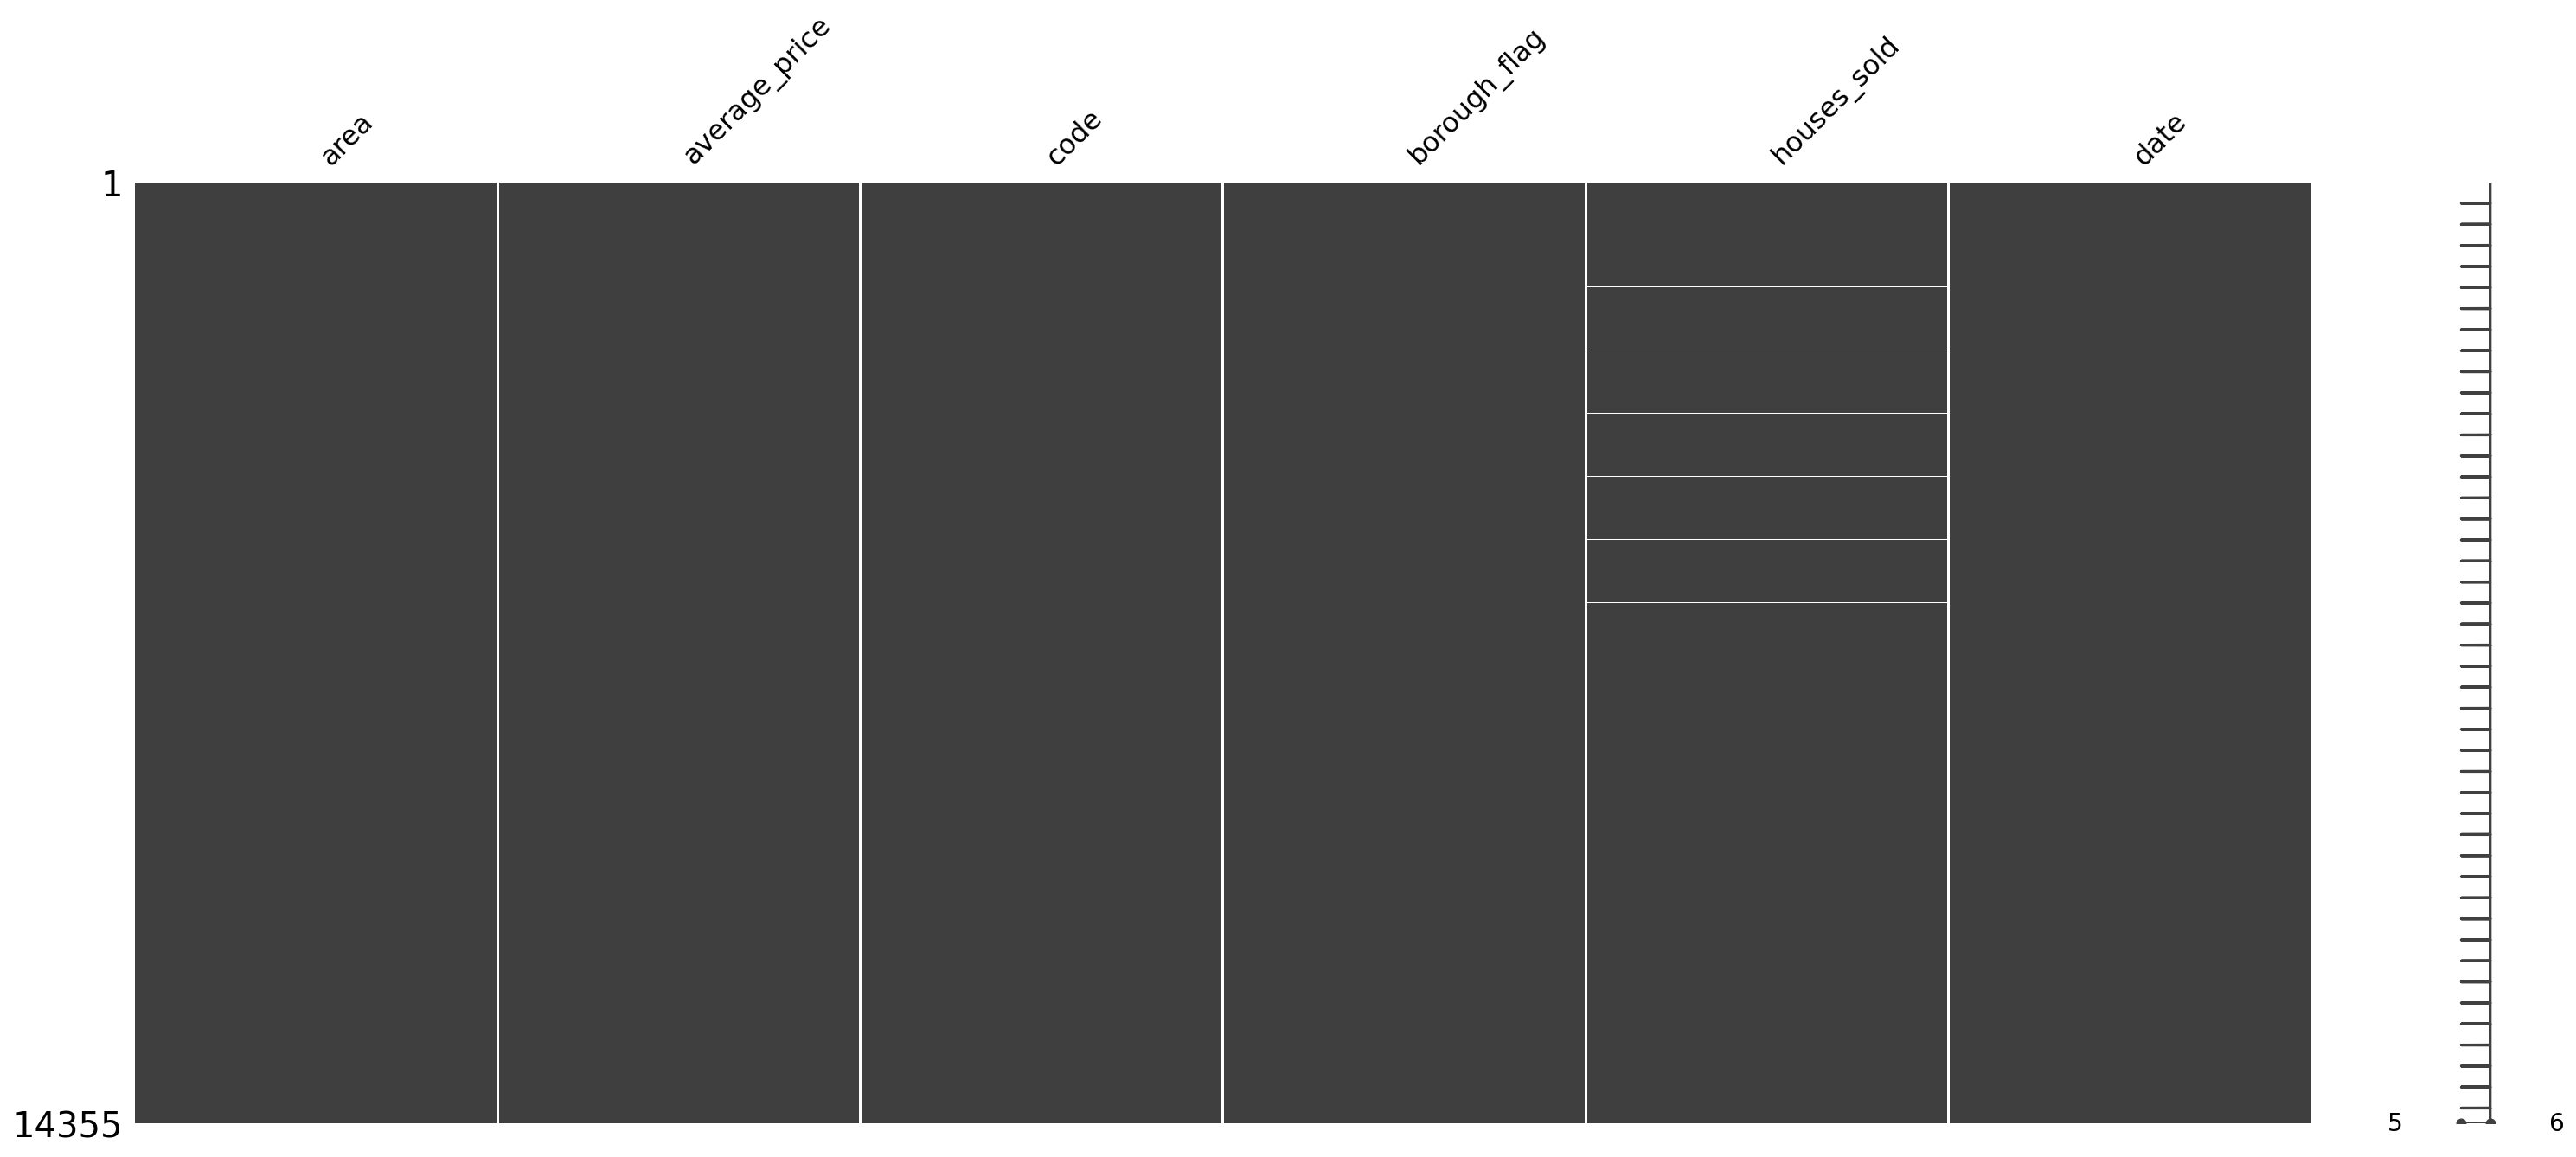

In [5]:
msno.matrix(df);

thanks to our data cleaning in SQL our monthly data is looking pretty good

In [6]:
# Drop rows with missing target values
missing_target_rows = df[df['houses_sold'].isna()].index
df = df.drop(missing_target_rows, axis=0).reset_index(drop=True)

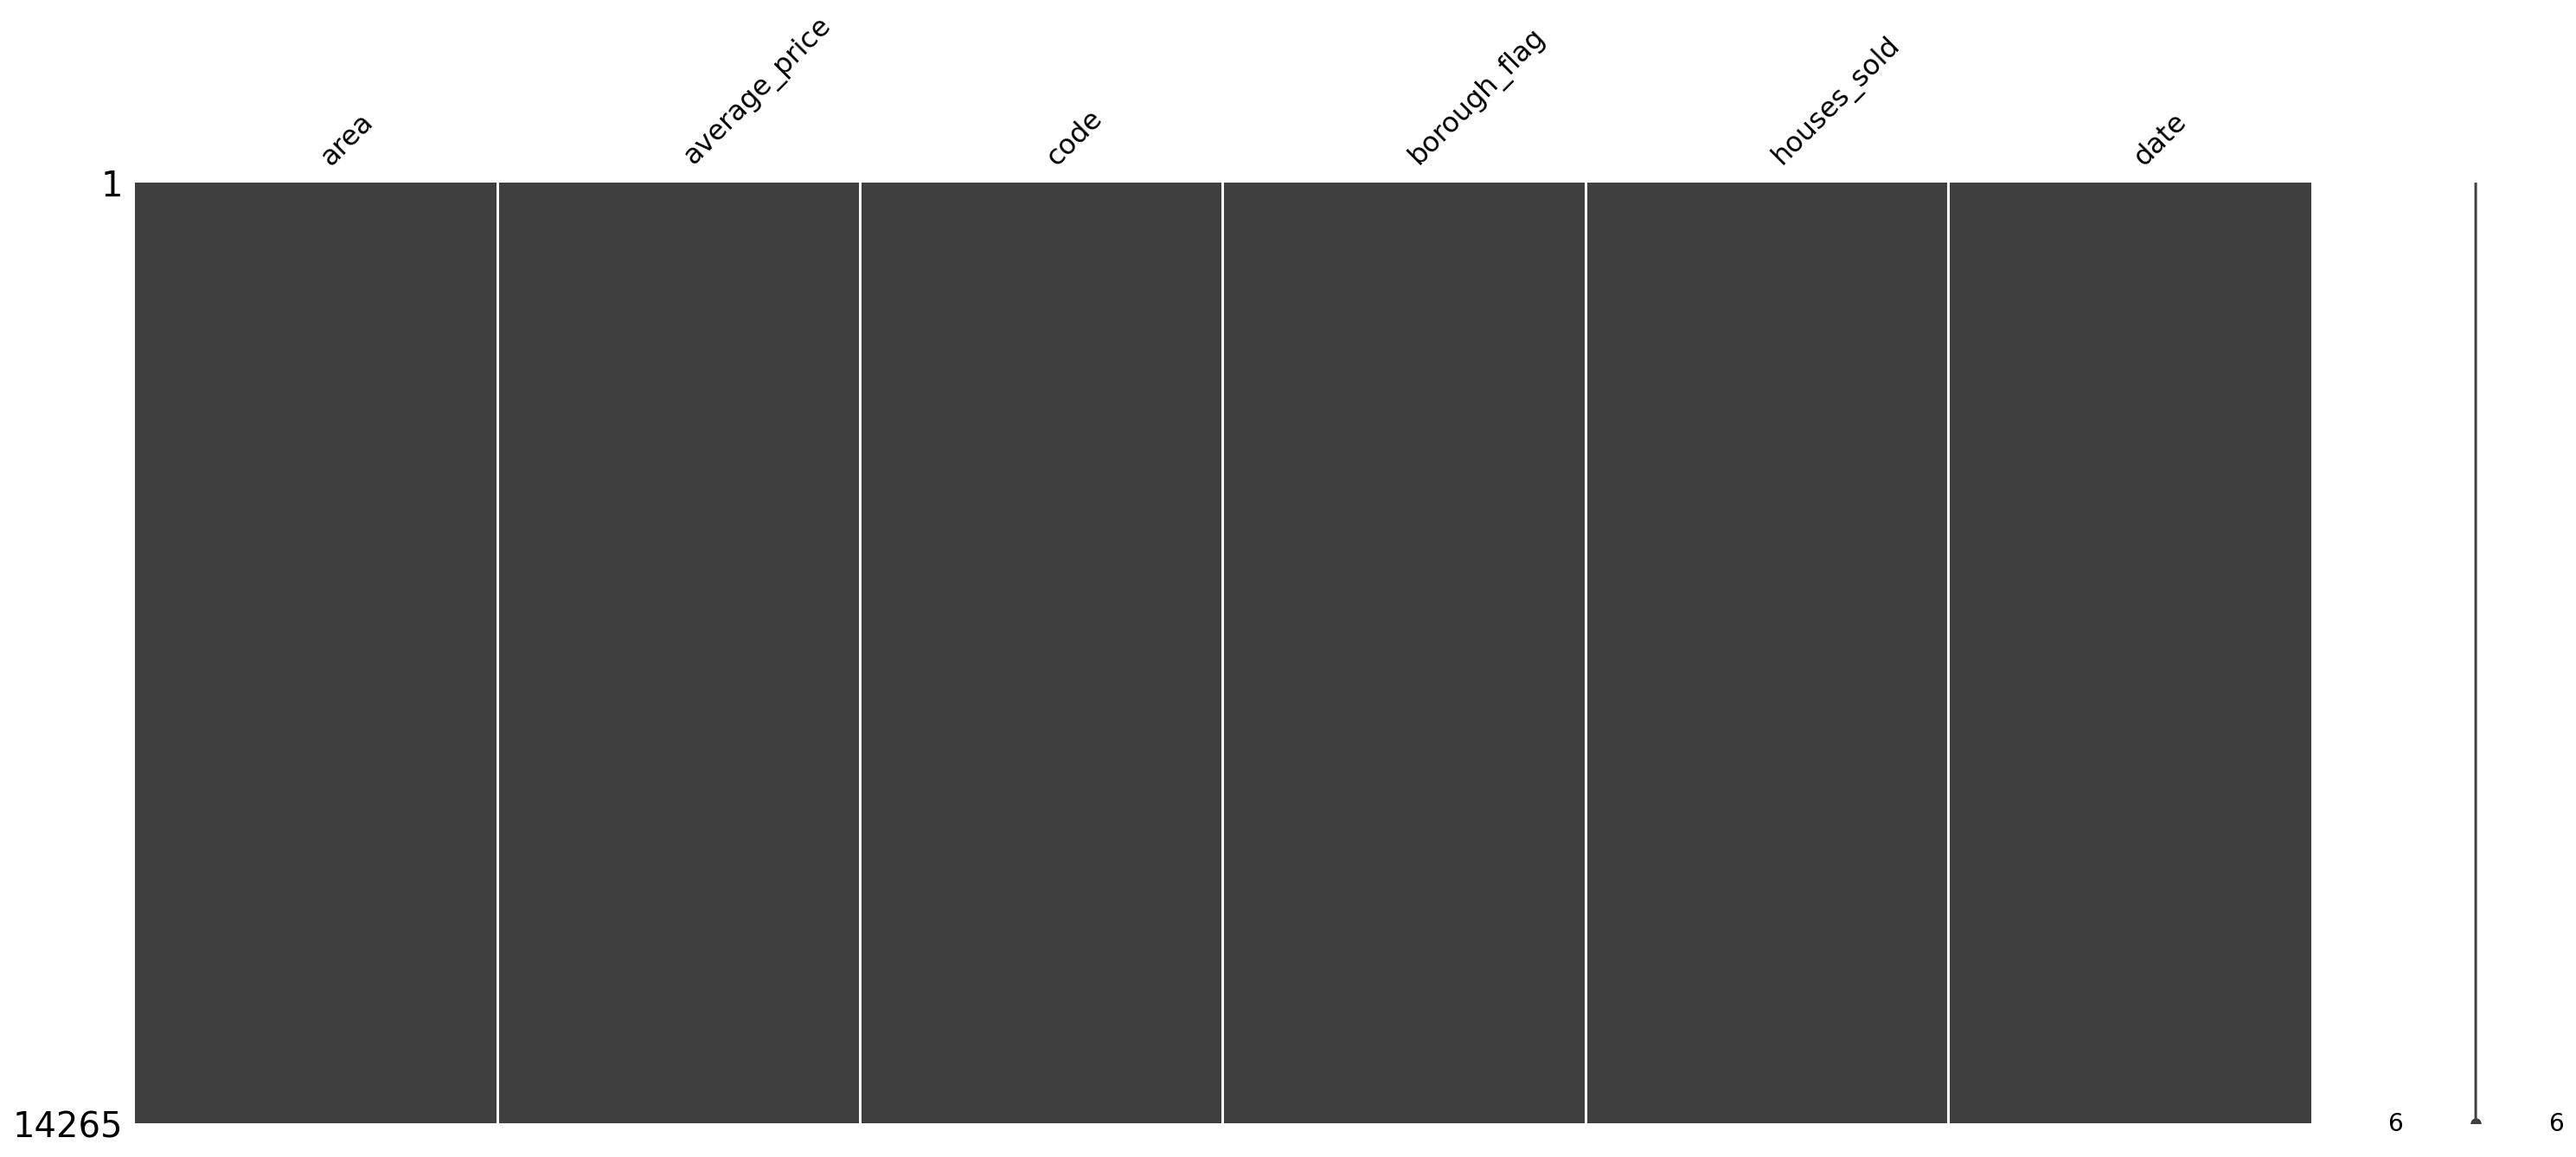

In [7]:
msno.matrix(df);

In [8]:
null_df = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending = False)*100

null_df = pd.concat([null_df, percent], axis = 1, keys = ['Counts', '% Missing'])
null_df

,Counts,% Missing
date,0,0.00
houses_sold,0,0.00
borough_flag,0,0.00
code,0,0.00
average_price,0,0.00
area,0,0.00


In [9]:
display(df1.describe())

,date,borough_flag,average_price,houses_sold,age,no_males,no_females,dwellings_per_hect,no_dwellings,Recycling_Rates,life,anxiouos,happy,worth,total_hourly_pay,male_hourly_pay,female_hourly_pay
count,"140,916.00","140,916.00","140,916.00","140,916.00","140,691.00","140,691.00","140,691.00","105,105.00","105,105.00","117,572.00","53,872.00","53,872.00","53,872.00","53,872.00","107,107.00","107,107.00","107,107.00"
mean,"2,010.42",0.83,"336,457.40","2,542.08",44.86,"9,820.38","10,136.94",28.69,"101,421.11",30.52,7.46,3.14,7.38,7.69,14.03,15.29,12.90
std,5.98,0.38,"197,609.19","9,616.11",26.20,"36,972.19","37,513.68",16.45,"26,578.61",10.56,0.20,0.31,0.19,0.17,2.49,2.89,2.33
min,"1,995.00",0.00,"42,287.64",8.17,0.00,0.00,0.00,8.19,"5,009.00",2.00,7.00,2.19,6.81,7.14,7.62,8.45,6.43
25%,"2,006.00",1.00,"209,707.76",213.92,22.00,816.50,894.00,16.90,"85,993.90",23.00,7.33,2.96,7.25,7.59,12.29,13.14,11.29
50%,"2,011.00",1.00,"290,396.71",304.67,45.00,"1,520.00","1,518.00",21.75,"101,193.50",30.00,7.48,3.14,7.38,7.71,13.84,15.13,12.87
75%,"2,016.00",1.00,"420,083.66",463.17,68.00,"2,445.00","2,419.00",41.98,"119,656.80",38.00,7.60,3.35,7.51,7.81,15.43,16.90,14.37
max,"2,021.00",1.00,"1,363,880.12","105,304.75",90.00,"399,614.00","688,517.00",70.84,"161,060.00",55.00,7.96,3.89,7.91,8.07,21.28,26.33,20.47


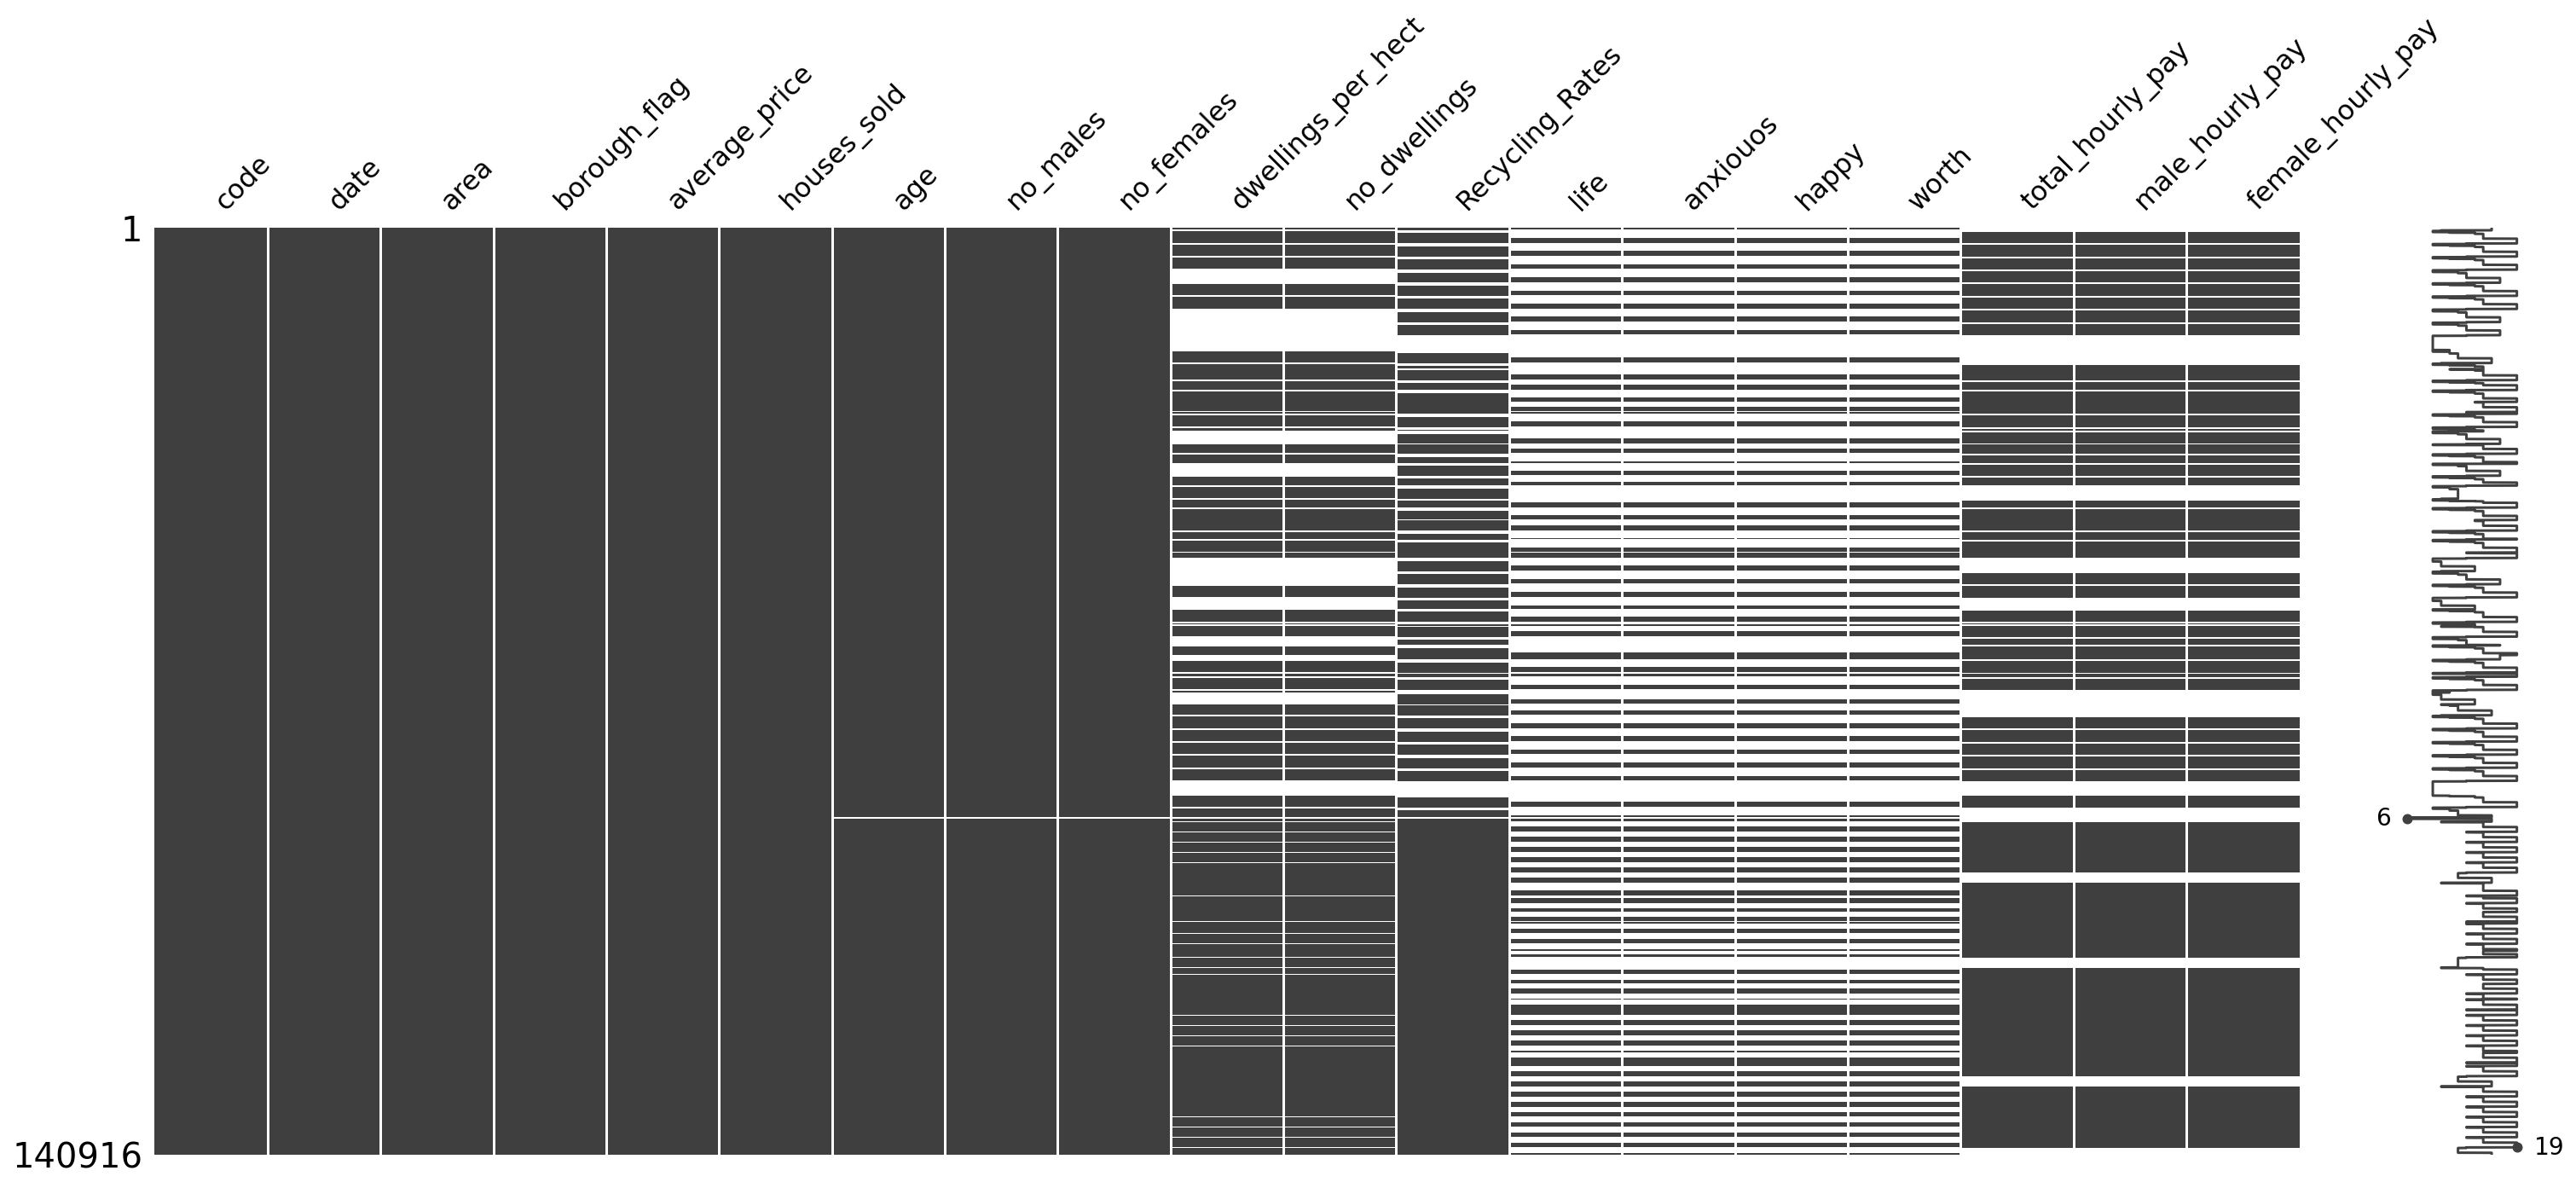

In [10]:
msno.matrix(df1);

our annual data becomes a bit sparse once we hit the dwellings per hectre section

In [11]:
null_df1 = df1.isnull().sum().sort_values(ascending = False)
percent = (df1.isnull().sum()/df1.isnull().count()).sort_values(ascending = False)*100

null_df1 = pd.concat([null_df1, percent], axis = 1, keys = ['Counts', '% Missing'])
null_df1

,Counts,% Missing
worth,87044,61.77
happy,87044,61.77
anxiouos,87044,61.77
life,87044,61.77
dwellings_per_hect,35811,25.41
no_dwellings,35811,25.41
male_hourly_pay,33809,23.99
female_hourly_pay,33809,23.99
total_hourly_pay,33809,23.99
Recycling_Rates,23344,16.57


my initial instincit is that the reason for this is due to missing boroughs in joined datasets as the null vlaues persist all the way accross each row

lets start by removing non boroughs

it seems best to drop the life, anxious, happy, worth and dwllings columns due to the amount of nulls. The less tangible measures are also the ones that we are dropping which is good for our accuracy!

In [12]:
df1 = df1[df1['borough_flag'] != 0]

As we only have one borough value this column is now redunant

In [13]:
df1.drop('borough_flag', axis=1, inplace=True)

In [14]:
df1.drop(['life', 'anxiouos', 'happy', 'worth', 'dwellings_per_hect', 'no_dwellings'], axis=1, inplace=True)

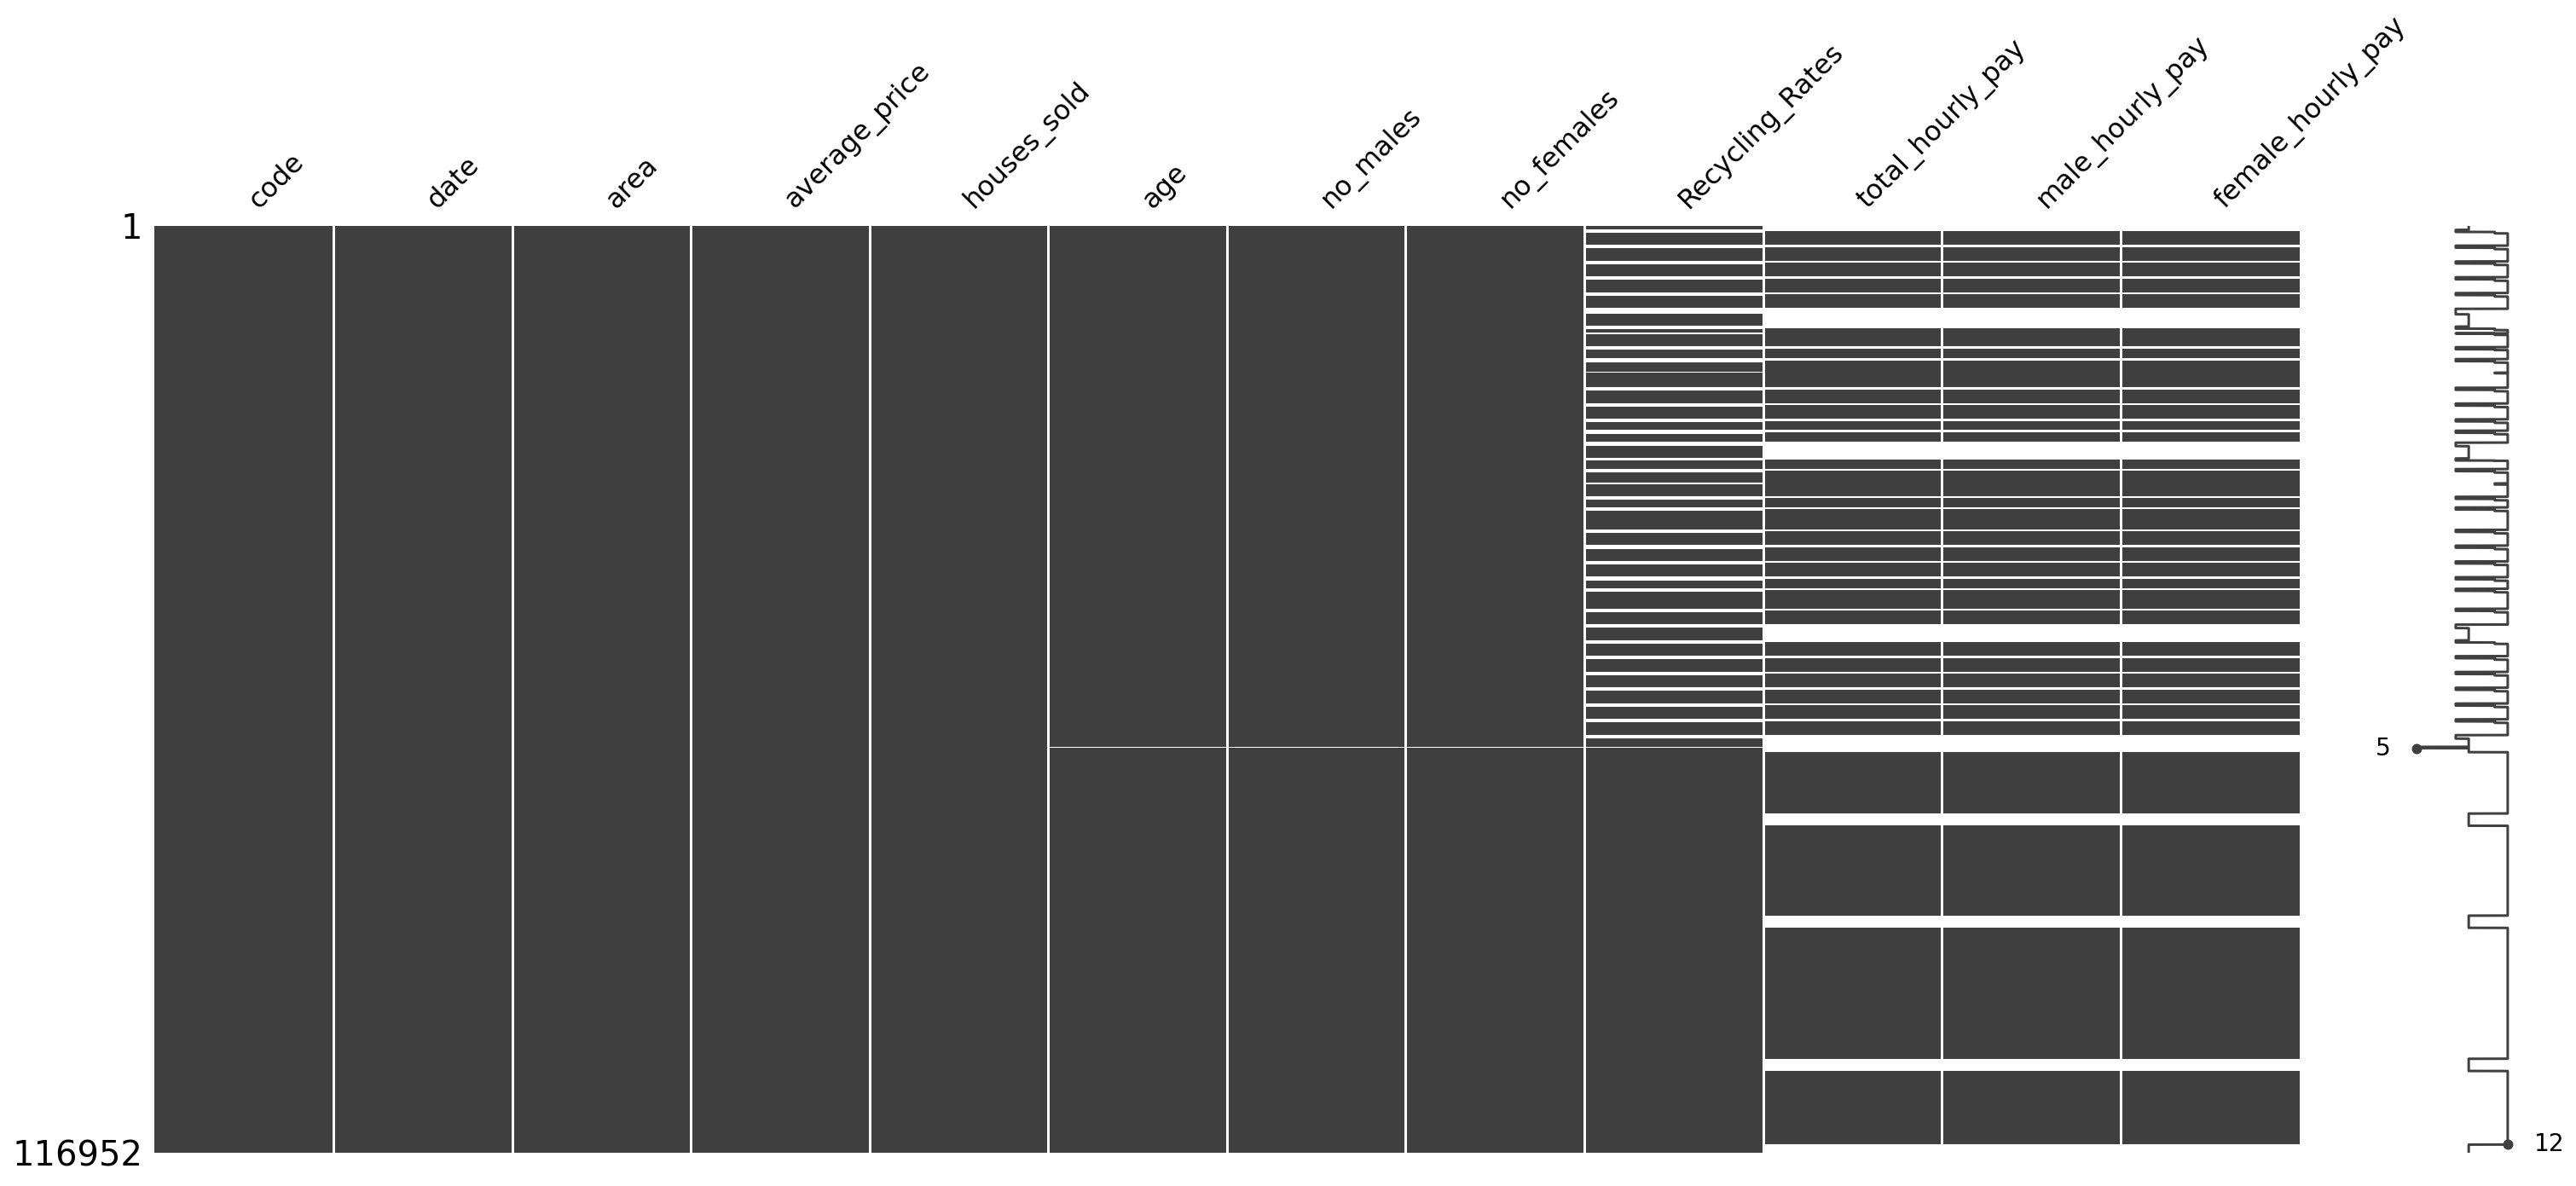

In [15]:
msno.matrix(df1);

as we know from our SQL data exploration allot of the reason for this will be because pay and recycling data only runs from 2004-2019.

In [16]:
#lets drop data sourounding these dates
null_values = df1[(df1['date']>=2014) & (df1['date']<=2020) & (df1['male_hourly_pay'].isna())].groupby(['area','date']).count()

In [17]:
null_values.isnull()

code  average_price  houses_sold    age  no_males  \
area                 date                                                       
Barking & Dagenham   2014  False          False        False  False     False   
                     2015  False          False        False  False     False   
                     2016  False          False        False  False     False   
                     2017  False          False        False  False     False   
                     2018  False          False        False  False     False   
                     2019  False          False        False  False     False   
                     2020  False          False        False  False     False   
City of London       2014  False          False        False  False     False   
                     2015  False          False        False  False     False   
                     2016  False          False        False  False     False   
                     2017  False          False        False  False     False   
                     2018  False          False        False  False     False   
                     2019  False          False        False  False     False   
                     2020  False          False        False  False     False   
Hammersmith & Fulham 2014  False          False        False  False     False   
                     2015  False          False        False  False     False   
                     2016  False          False        False  False     False   
                     2017  False          False        False  False     False   
                     2018  False          False        False  False     False   
                     2019  False          False        False  False     False   
                     2020  False          False        False  False     False   
Kensington & Chelsea 2014  False          False        False  False     False   
                     2015  False          False        False  False     False   
                     2016  False          False        False  False     False   
                     2017  False          False        False  False     False   
                     2018  False          False        False  False     False   
                     2019  False          False        False  False     False   
                     2020  False          False        False  False     False   

                           no_females  Recycling_Rates  total_hourly_pay  \
area                 date                                                  
Barking & Dagenham   2014       False            False             False   
                     2015       False            False             False   
                     2016       False            False             False   
                     2017       False            False             False   
                     2018       False            False             False   
                     2019       False            False             False   
                     2020       False            False             False   
City of London       2014       False            False             False   
                     2015       False            False             False   
                     2016       False            False             False   
                     2017       False            False             False   
                     2018       False            False             False   
                     2019       False            False             False   
                     2020       False            False             False   
Hammersmith & Fulham 2014       False            False             False   
                     2015       False            False             False   
                     2016       False            False             False   
                     2017       False            False             False   
                     2018       False            False             False   
 

In [18]:
df1 = df1[(df1['date']>=2014) & (df1['date']<=2020)]

In [19]:
df1[df1['total_hourly_pay'].isna()]['area'].unique()

array(['Kensington & Chelsea', 'Barking & Dagenham', 'City of London',
       'Hammersmith & Fulham'], dtype=object)

In [20]:
df1 = df1[df1.isin(['Kensington & Chelsea', 'Barking & Dagenham', 'City of London',
       'Hammersmith & Fulham'])['area'] == False ]

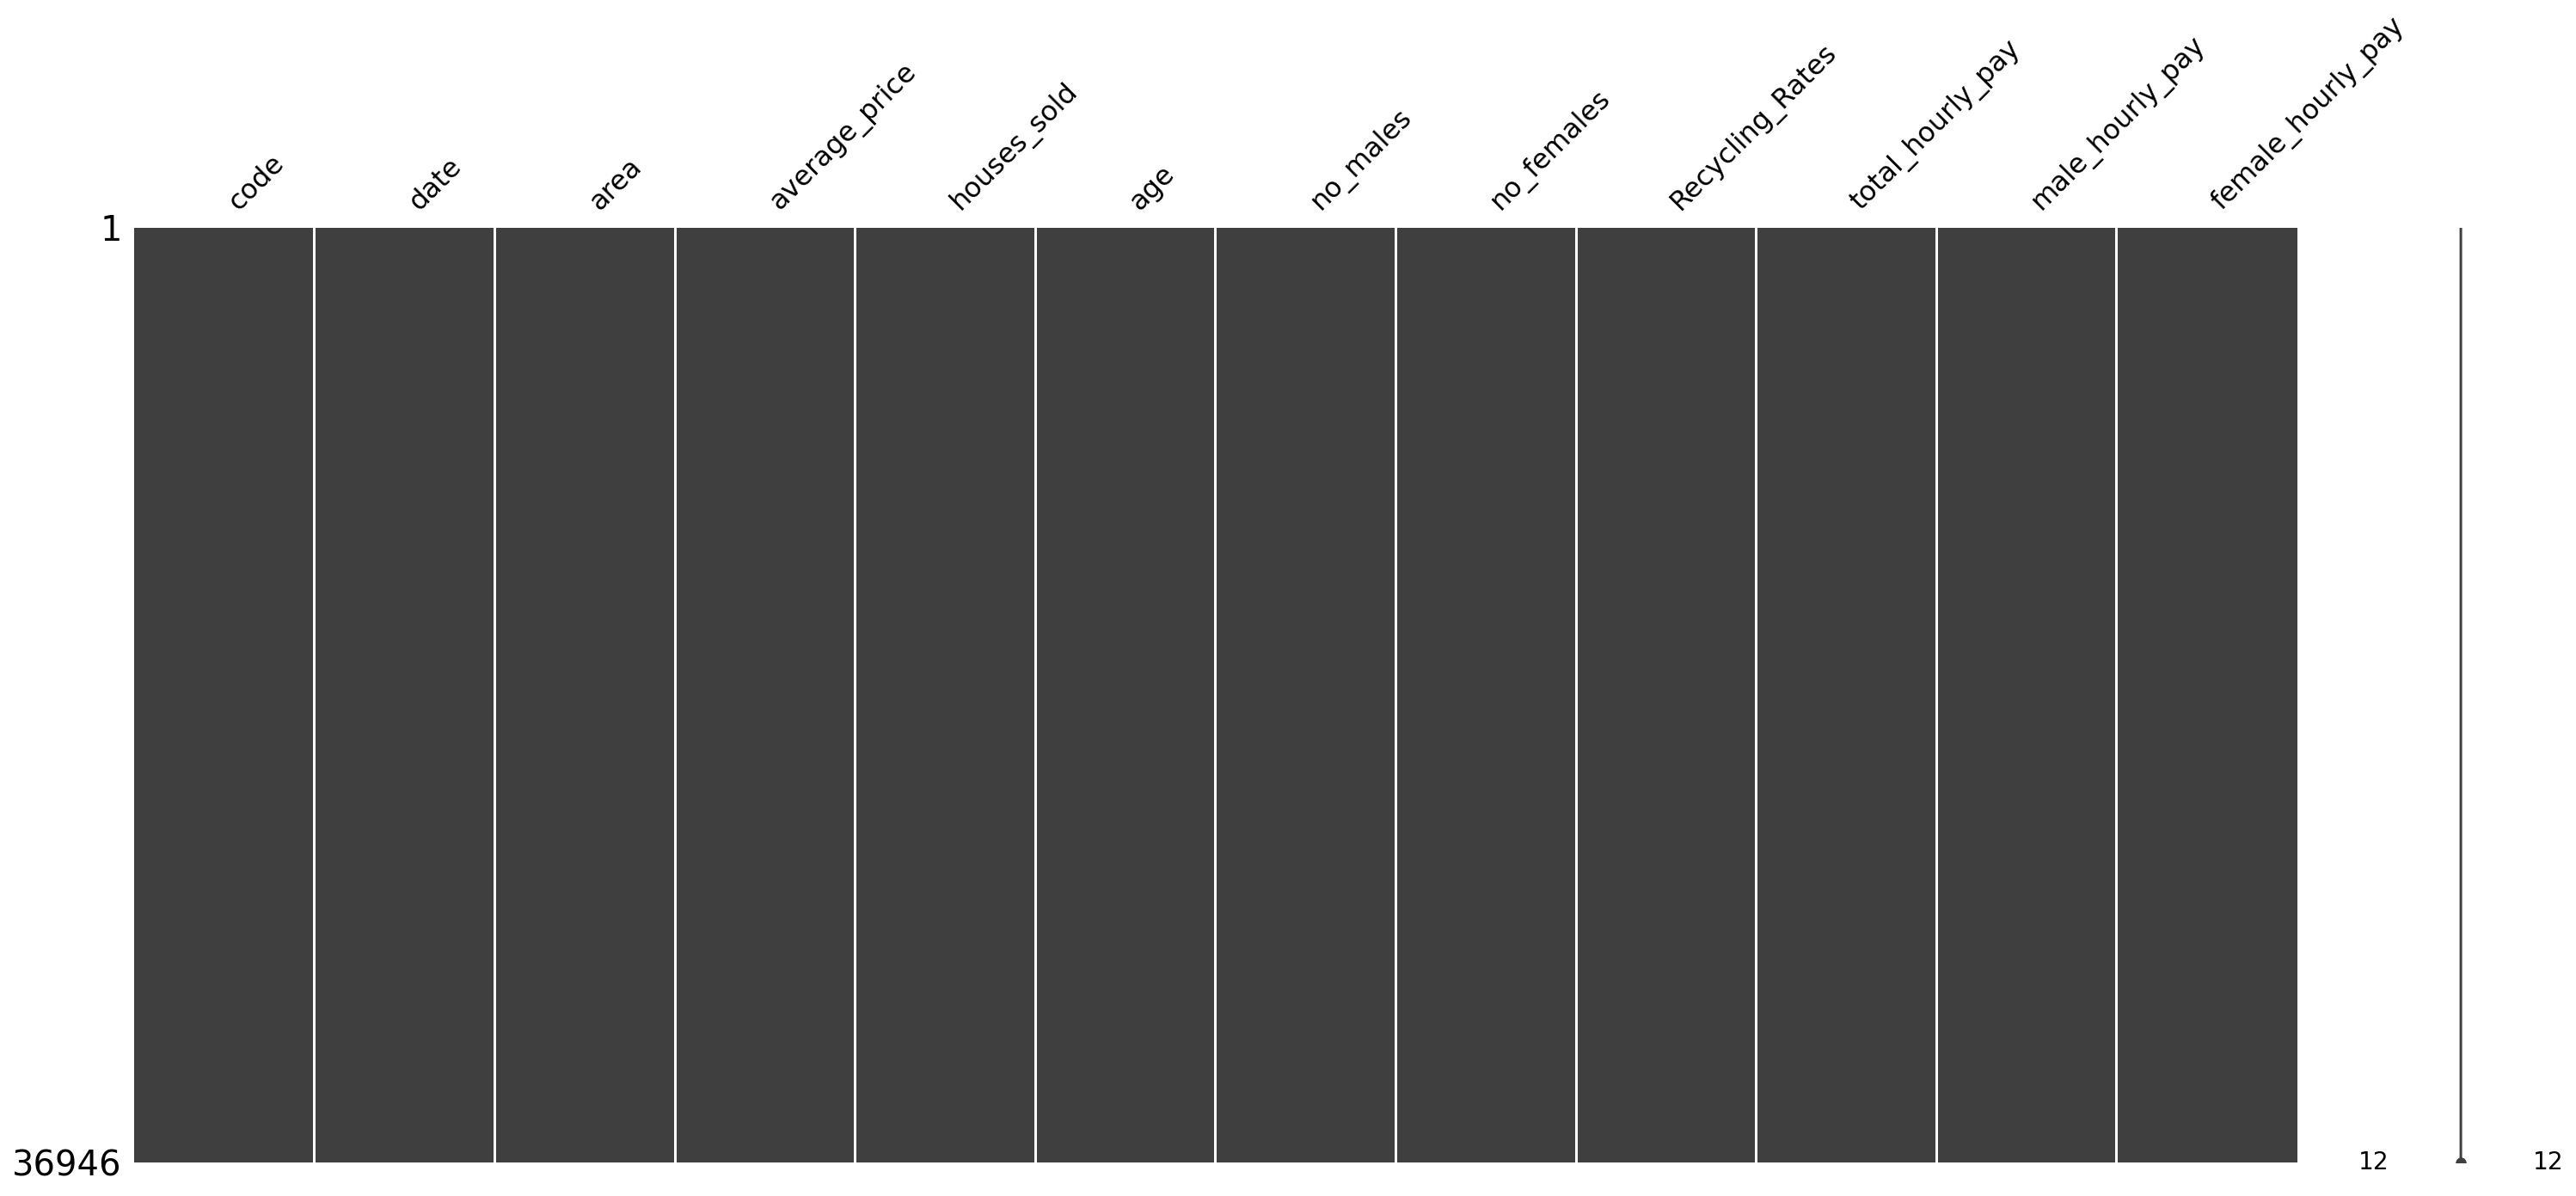

In [21]:
msno.matrix(df1);

<h4>How many area do we now have?</h4>

In [22]:
'We have {areas} areas, from years {min_year} to {max_year}'.format(areas=df1['area'].nunique(), min_year=df1['date'].min(), max_year=df1['date'].max())

'We have 29 areas, from years 2014 to 2020'

# Basic EDA

<AxesSubplot:xlabel='average_price', ylabel='Density'>

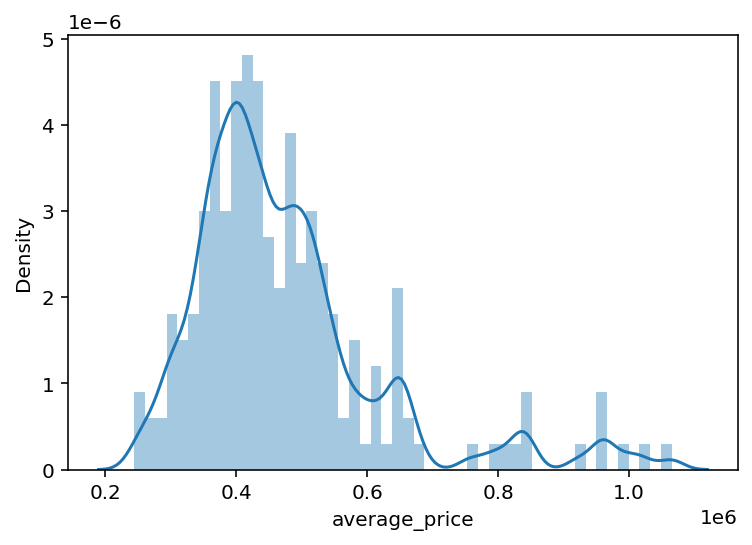

In [23]:
sns.distplot(df1['average_price'])

<AxesSubplot:>

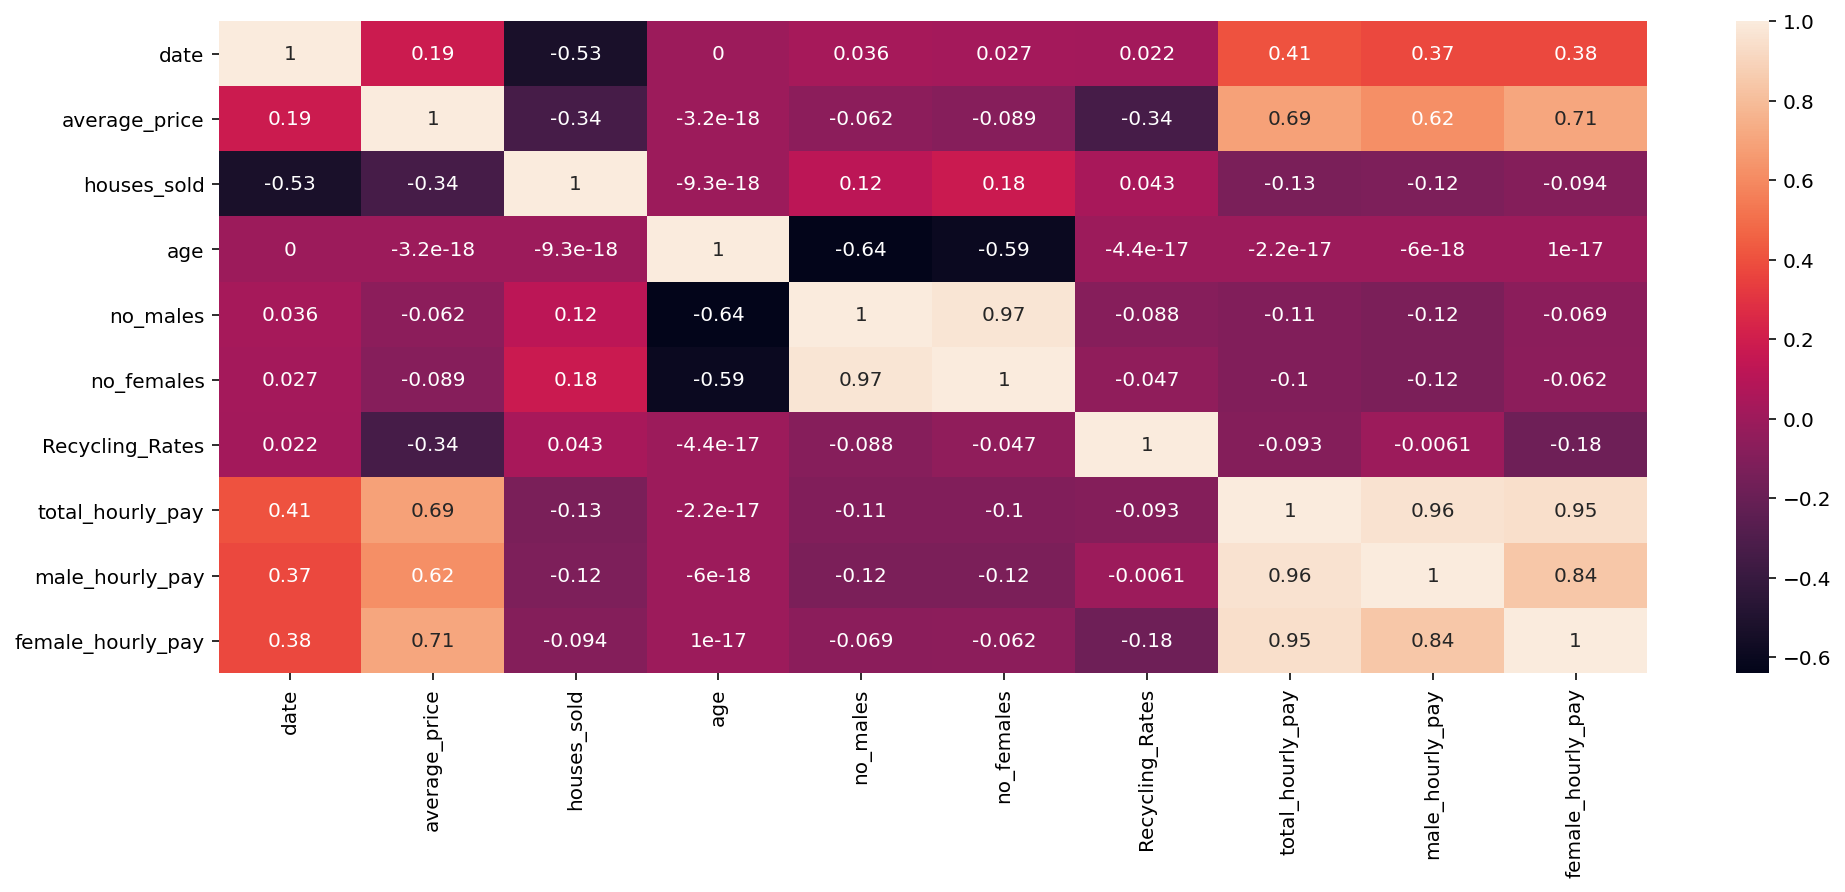

In [24]:
plt.figure(figsize=(16, 6))
sns.heatmap(df1.corr(), annot=True)

As expected the **average price** of houses being sold are most **postively correlated** with the amount **individuals salary**, most so **female hourly pay**.

<Figure size 864x576 with 0 Axes>

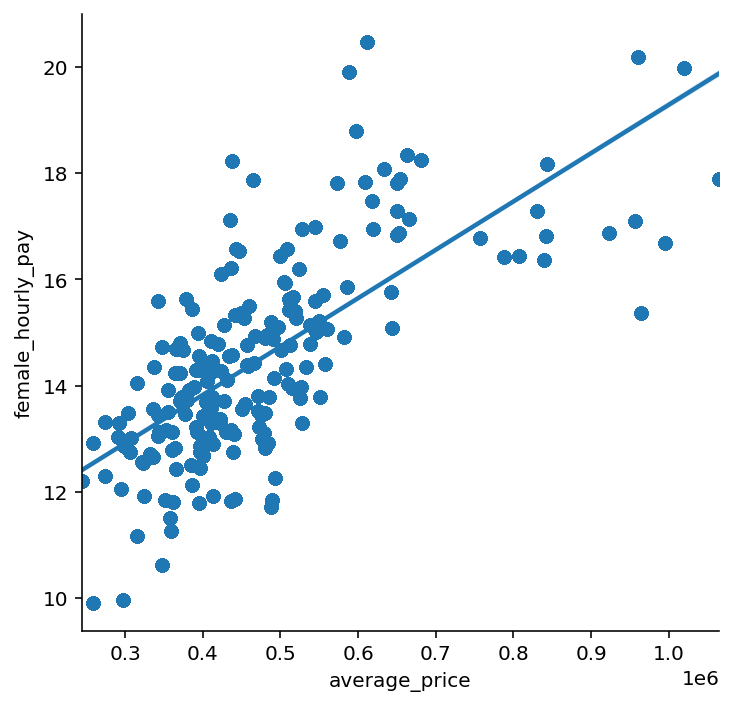

In [25]:
plt.figure(figsize=(12,8))
sns.lmplot(x='average_price',y='female_hourly_pay',data=df1)

In [26]:
kingston_sns = df1[df1['area'] ==  "Kingston upon Thames"]
kingston_sns = kingston_sns.groupby('date')['no_males','no_females'].sum()
kingston_sns

,no_males,no_females
date,,
2014,"166,826.00","173,090.00"
2015,"170,916.00","176,134.00"
2016,"173,544.00","178,670.00"
2017,"171,750.00","177,468.00"
2018,"173,468.00","177,472.00"
2019,"175,828.00","179,186.00"
2020,"177,950.00","180,334.00"


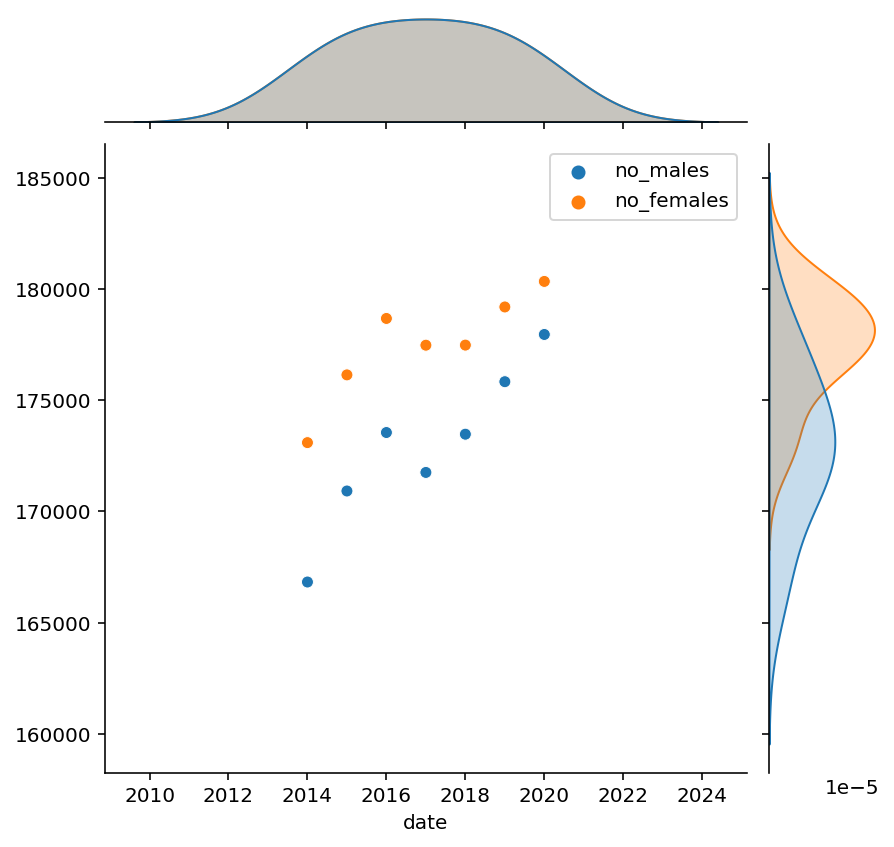

In [27]:
sns.jointplot(data=kingston_sns)

# Export for Tableau

In [28]:
df1.to_csv('london_annual_data.csv')

# Basic predictions

In [29]:
london_mean_price = df.groupby('date')['average_price'].mean()

In [30]:
london_mean_price = london_mean_price.reset_index()

In [31]:
london_mean_price

,date,average_price
0,1995-01-01,"75,157.69"
1,1995-02-01,"74,804.53"
2,1995-03-01,"74,702.90"
3,1995-04-01,"74,851.01"
4,1995-05-01,"75,564.92"
...,...,...
312,2021-01-01,"481,991.38"
313,2021-02-01,"479,530.87"
314,2021-03-01,"480,740.59"
315,2021-04-01,"480,979.02"


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Text(40.75, 0.5, 'Amount')

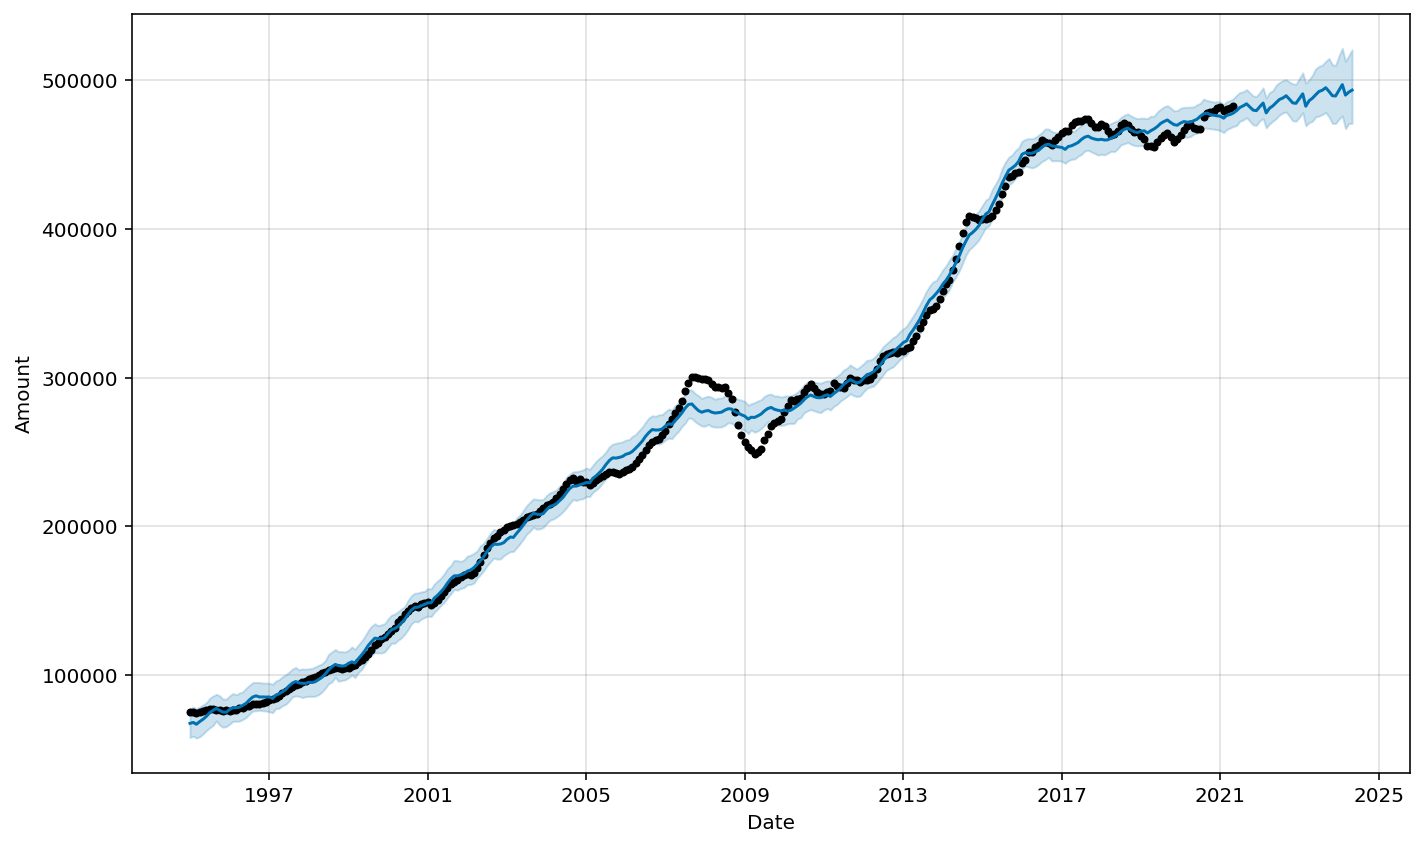

In [32]:
# Prepare the 
model_df = pd.DataFrame(london_mean_price)
model_df = model_df.rename(columns={'date': 'ds', 'average_price': 'y'})

# Initialise the model and make predictions
m = Prophet()
m.fit(model_df)

future = m.make_future_dataframe(periods=36, freq='M')

forecast = m.predict(future)

# Visualise the prediction
fig1 = m.plot(forecast)
plt.xlabel("Date")
plt.ylabel("Amount")

In [33]:
kingston = df[df['area'] == 'Kingston upon Thames'].groupby('date')['average_price'].mean().reset_index()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Text(40.75, 0.5, 'Amount')

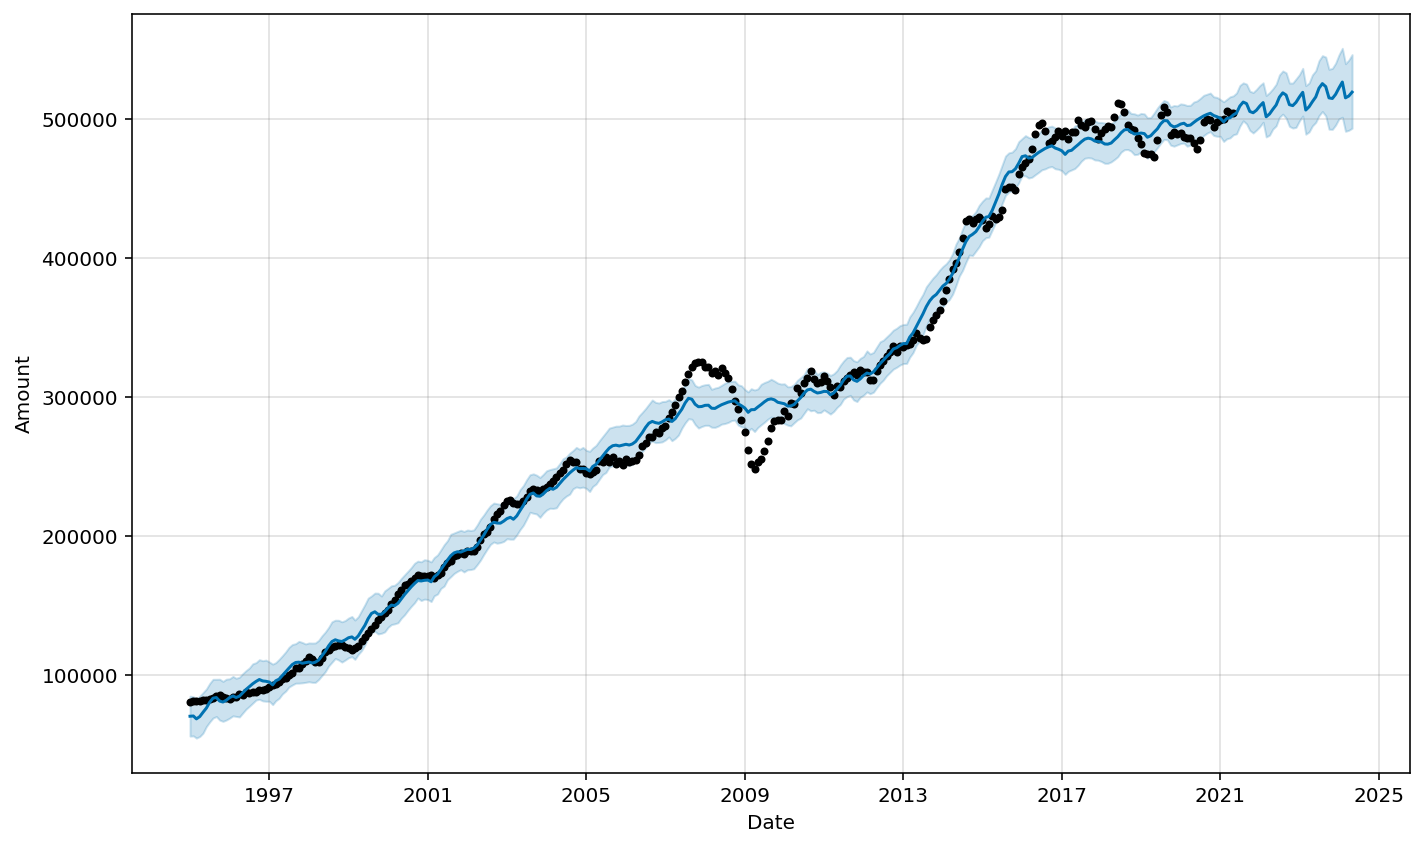

In [34]:
# Prepare the 
model_df = pd.DataFrame(kingston)
model_df = model_df.rename(columns={'date': 'ds', 'average_price': 'y'})

# Initialise the model and make predictions
m = Prophet()
m.fit(model_df)

future = m.make_future_dataframe(periods=36, freq='M')

forecast = m.predict(future)

# Visualise the prediction
fig1 = m.plot(forecast)
plt.xlabel("Date")
plt.ylabel("Amount")

In [35]:
lnd_pr = df.groupby('date')['average_price'].mean()

In [36]:
special = forecast[['trend','ds']].groupby('ds').mean()

In [37]:
actuals = pd.DataFrame(lnd_pr)

In [38]:
forecasts = special[320:]

In [39]:
actual_forecast = actuals.append(forecasts)

In [40]:
@gif.frame
def plot(df_lnd, date):
    
    ### select a sub-dataframe from the start until date ###
    d_ln = df_lnd.loc[df_lnd.index[0]:date]
    
    fig = plt.figure(figsize = (9, 5))
    plt.xlim(pd.Timestamp('1994-12-01'), df_lnd.index[-1] +relativedelta(months=+12))
    plt.ylim(47000, 550000)
    
    ### for the vertical orange rectangle and the vertical dashed line ###
    if (date > pd.Timestamp('2007-12-22') and date < pd.Timestamp('2009-06-21')):
        plt.axvspan(pd.Timestamp('2007-12-21'), date, alpha = 0.5, color = '#DB4437') 
    elif (date > pd.Timestamp('2009-06-21')):
        plt.axvspan(pd.Timestamp('2007-12-21'), pd.Timestamp('2009-06-21'), alpha = 0.5, color = '#DB4437')
        plt.text(x = pd.Timestamp('2008-04-29'), y = 390000, s = 'Recession', rotation = 90, fontsize = font_size-2)
    if (date > pd.Timestamp('2016-06-23')):
        plt.axvline(x = pd.Timestamp('2016-06-23'), lw = 2, color = '#4285F4', linestyle = '--')
        plt.text(x = pd.Timestamp('2015-08-01'), y = 210000, s = 'Brexit Referendum', rotation = 90, fontsize = font_size-2)
    if (date > pd.Timestamp('2020-01-29')):
        plt.axvline(x = pd.Timestamp('2020-01-29'), lw = 2, color = '#DB4437', linestyle = '--')
        plt.text(x = pd.Timestamp('2019-01-29'), y = 210000, s = 'COVID', rotation = 90, fontsize = font_size-2)
    if (date > pd.Timestamp('2021-08-21') and date < pd.Timestamp('2022-07-15')):
        plt.axvspan(pd.Timestamp('2021-08-21'), date, alpha = 0.5, color = '#0F9D58')        
    elif (date > pd.Timestamp('2022-07-15')):
        plt.axvspan(pd.Timestamp('2021-08-20'), date, alpha = 0.5, color = '#0F9D58')
        plt.text(x = pd.Timestamp('2022-07-01'), y = 210000, s = 'Forecast', rotation = 90, fontsize = font_size-2)
    ############################################################################################################
    
    plt.plot(d_ln, color = 'royalblue', lw = 2, label = 'London')
    
    plt.title('Average London House Price', size = font_size)
    plt.ylabel('Price', size = font_size)
    plt.xticks(size = font_size - 3)
    plt.xlabel('Date', size = font_size)
    plt.yticks(size = font_size - 3)
    plt.legend().remove()

In [41]:
frames = []
for months in pd.date_range(start = actual_forecast.index[0], end = actual_forecast.index[-1], freq = '3MS'): # 3MS --> every three months
    frame = plot(actual_forecast, months)
    frames.append(frame)
    
gif.save(frames, 'London_houses.gif', duration = 1, unit = 's', between = 'startend')

In [42]:
HTML('<img src="London_houses.gif" />')

# Proccessing for machine learning

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [44]:
df = df[df['borough_flag'] != 0]

In [45]:
df.drop('borough_flag', axis=1, inplace=True)

# Monthly Data

## Pre Processing

In [46]:
df

,area,average_price,code,houses_sold,date
0,City of London,"91,448.98",E09000001,17.00,1995-01-01
1,City of London,"82,202.77",E09000001,7.00,1995-02-01
2,City of London,"79,120.70",E09000001,14.00,1995-03-01
3,City of London,"77,101.21",E09000001,7.00,1995-04-01
4,City of London,"84,409.15",E09000001,10.00,1995-05-01
...,...,...,...,...,...
10456,Westminster,"934,196.31",E09000033,158.00,2021-01-01
10457,Westminster,"945,075.02",E09000033,136.00,2021-02-01
10458,Westminster,"953,245.82",E09000033,288.00,2021-03-01
10459,Westminster,"947,466.29",E09000033,121.00,2021-04-01


In [47]:
df_ml = df

In [48]:
# Drop redundant columns
df_ml = df_ml.drop('code', axis=1)

### Feature Engineering from Date

In [49]:
# Extract date features
df_ml['date'] = pd.to_datetime(df_ml['date'])
df_ml['year'] = df_ml['date'].apply(lambda x: x.year)
df_ml['month'] = df_ml['date'].apply(lambda x: x.month)
df_ml = df_ml.drop('date', axis=1)

### Further EDA

Now that we have the months seperated out we can see that house prices tend to peak at the end of the year as expected due to prices increaseing over time. However interestingly we also see house prices tend to **drop in June** each year followed by a **rapid increase** for the **later half of the year**

<AxesSubplot:xlabel='month'>

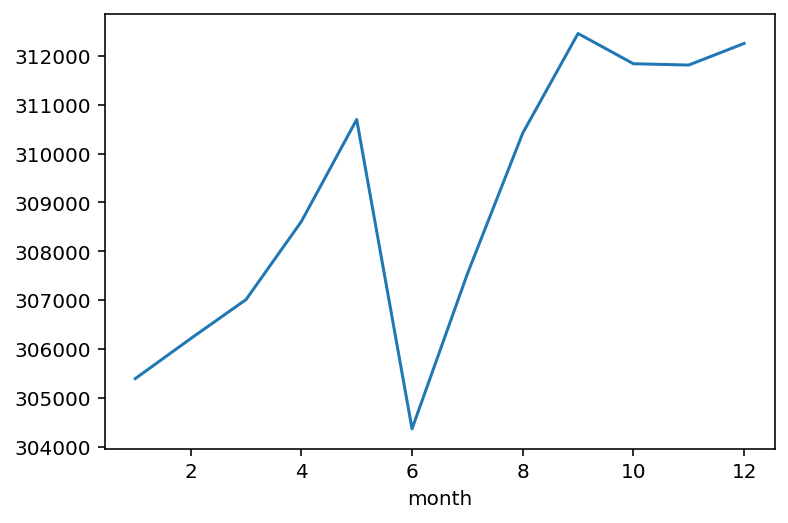

In [50]:
df_ml.groupby('month').mean()['average_price'].plot()

In [51]:
pv_df_ml = df_ml.pivot_table(values='average_price',index='month',columns='year')
pv_df_ml

year,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
month,,,,,,,,,,,,,,,,,,,,,
1,"81,906.39","83,282.80","91,209.34","107,636.77","116,865.77","143,409.89","168,327.17","189,159.16","222,882.43","236,771.43",...,"336,011.74","360,201.41","408,897.10","466,945.75","510,463.65","532,762.74","538,508.23","527,794.50","526,826.02","546,632.90"
2,"81,527.95","83,612.20","92,297.68","108,718.96","118,068.51","145,750.26","166,164.64","188,452.18","223,152.31","237,577.34",...,"336,266.23","363,108.35","414,666.09","467,085.43","513,110.89","534,957.84","536,385.83","524,655.86","531,540.02","542,854.15"
3,"81,349.31","83,879.19","93,398.70","109,767.39","119,381.74","148,087.36","167,379.06","189,370.38","224,167.39","238,245.01",...,"336,804.72","363,636.59","418,181.06","467,687.63","519,164.66","534,993.74","532,603.75","519,521.58","534,371.59","543,342.59"
4,"81,432.45","85,256.19","94,555.20","111,291.68","121,149.54","152,303.17","169,209.67","192,739.08","224,261.09","240,290.42",...,"339,545.24","368,369.50","425,198.13","468,686.48","519,172.78","539,543.12","528,157.00","518,359.38","537,384.82","544,319.38"
5,"82,277.31","85,496.75","96,491.57","112,239.20","123,095.17","155,014.29","172,248.08","197,100.41","225,430.96","243,170.21",...,"345,076.34","372,161.25","434,858.28","473,062.21","522,598.99","541,460.86","528,980.98","517,318.96","534,016.89","546,375.93"
6,"83,358.44","86,494.65","98,260.79","113,370.77","125,191.27","158,727.11","175,550.53","202,895.95","226,357.55","246,723.74",...,"351,603.09","379,239.66","445,314.84","478,172.12","523,247.97","542,229.42","531,437.33","522,055.44","531,608.74",nan
7,"84,274.69","86,904.46","100,236.73","114,575.27","127,339.70","161,225.00","178,514.37","207,677.15","228,300.78","250,587.14",...,"355,416.01","383,972.21","455,921.89","486,140.97","526,970.87","540,980.02","535,969.22","524,106.89","530,809.03",nan
8,"84,356.57","87,920.52","101,356.93","115,812.63","130,364.74","163,715.14","181,453.16","211,757.33","228,576.63","253,521.64",...,"357,102.60","389,322.02","464,378.69","491,579.63","524,891.79","542,005.92","537,603.55","526,945.54","540,557.33",nan
9,"83,782.78","88,364.92","103,177.52","116,384.53","134,170.49","164,985.20","182,781.60","215,151.52","229,701.77","254,726.65",...,"358,533.69","393,183.63","469,335.58","499,743.15","523,992.31","542,516.78","536,468.03","528,597.21","543,342.27",nan


<AxesSubplot:xlabel='year', ylabel='month'>

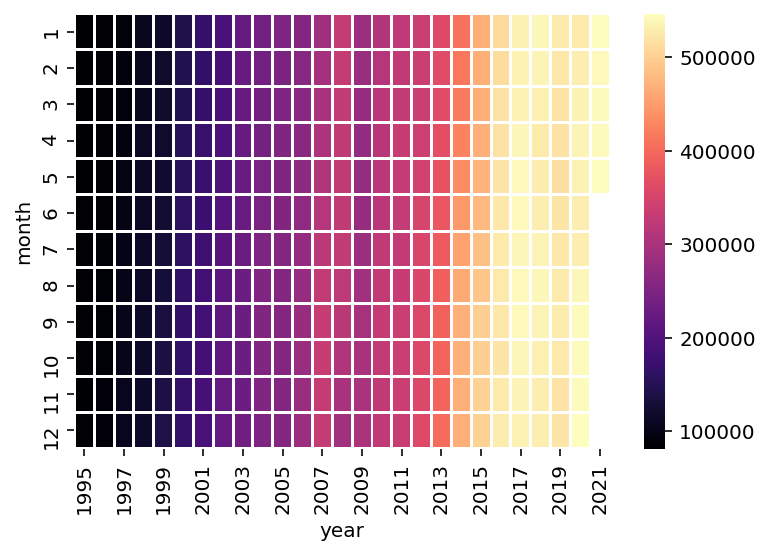

In [52]:
sns.heatmap(pv_df_ml ,cmap='magma',linecolor='white',linewidths=1)

### Categorical Features

Notice that the **area** column as categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.

Let's show you a way of dealing with these columns that can be expanded to multiple categorical features if necessary.

**Create a list of 1 element containing the string 'purpose'. Call this list cat_feats.**

In [53]:
cat_feats = ['area']

**Now use pd.get_dummies(loans,columns=cat_feats,drop_first=True) to create a fixed larger dataframe that has new feature columns with dummy variables. Set this dataframe as final_data.**

In [54]:
df_ml = pd.get_dummies(df_ml,columns=cat_feats,drop_first=True)

**This marks a 1 in the column which exists as true**

In [55]:
(df_ml['area_Newham']).unique()

array([0, 1], dtype=uint8)

In [56]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10461 entries, 0 to 10460
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   average_price              10461 non-null  float64
 1   houses_sold                10461 non-null  float64
 2   year                       10461 non-null  int64  
 3   month                      10461 non-null  int64  
 4   area_Barnet                10461 non-null  uint8  
 5   area_Bexley                10461 non-null  uint8  
 6   area_Brent                 10461 non-null  uint8  
 7   area_Bromley               10461 non-null  uint8  
 8   area_Camden                10461 non-null  uint8  
 9   area_City of London        10461 non-null  uint8  
 10  area_Croydon               10461 non-null  uint8  
 11  area_Ealing                10461 non-null  uint8  
 12  area_Enfield               10461 non-null  uint8  
 13  area_Greenwich             10461 non-null  uin

## Pricing Preditcitons

### Train Test Split

Now its time to split our data into a training set and a testing set!

**Use sklearn to split your data into a training set and a testing set as we've done in the past.**

In [57]:
# Split df into X and y
X = df_ml.drop('average_price', axis=1)
y = df_ml['average_price']

In [58]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

**Machine learning algorithm just sees number — if there is a vast difference in the range say few ranging in thousands and few ranging in the tens, and it makes the underlying assumption that higher ranging numbers have superiority of some sort.**

In [59]:
# Scale X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

### Training the models

In [60]:
models = {
    "                     Linear Regression": LinearRegression(),
    " Linear Regression (L2 Regularization)": Ridge(),
    " Linear Regression (L1 Regularization)": Lasso(),
    "                   K-Nearest Neighbors": KNeighborsRegressor(),
    "                        Neural Network": MLPRegressor(),
    "Support Vector Machine (Linear Kernel)": LinearSVR(),
    "   Support Vector Machine (RBF Kernel)": SVR(),
    "                         Decision Tree": DecisionTreeRegressor(),
    "                         Random Forest": RandomForestRegressor(),
    "                     Gradient Boosting": GradientBoostingRegressor(),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

                     Linear Regression trained.
 Linear Regression (L2 Regularization) trained.
 Linear Regression (L1 Regularization) trained.
                   K-Nearest Neighbors trained.
                        Neural Network trained.
Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.
                         Decision Tree trained.
                         Random Forest trained.
                     Gradient Boosting trained.


## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

### RMSE

In [61]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    rmse = np.sqrt(np.mean((y_test - y_pred)**2))
    print(name + " RMSE: {:.4f}".format(rmse))

                     Linear Regression RMSE: 74609.3980
 Linear Regression (L2 Regularization) RMSE: 74612.3735
 Linear Regression (L1 Regularization) RMSE: 74609.7556
                   K-Nearest Neighbors RMSE: 31608.8596
                        Neural Network RMSE: 354483.4024
Support Vector Machine (Linear Kernel) RMSE: 371038.9785
   Support Vector Machine (RBF Kernel) RMSE: 216979.1382
                         Decision Tree RMSE: 19041.8752
                         Random Forest RMSE: 15498.4905
                     Gradient Boosting RMSE: 38649.3604


### R-Squared

It is recommended to use **R-Squared** or rather adjusted R-Squared for evaluating the model performance of the **regression** models. This is primarily because R-Squared **captures the fraction of response variance** captured by the regression and tend to give better picture of quality of regression model.

$$R^2 = \frac {SSR}{SST} = \sqrt{\sum_{i=1}^n \frac{(\hat{y}_i-\bar{y})^2}{(y_i-\bar{y})^2}}$$

In [62]:
for name, model in models.items():
    print(name + " R^2: {:.4f}".format(model.score(X_test, y_test)))

                     Linear Regression R^2: 0.8749
 Linear Regression (L2 Regularization) R^2: 0.8749
 Linear Regression (L1 Regularization) R^2: 0.8749
                   K-Nearest Neighbors R^2: 0.9775
                        Neural Network R^2: -1.8245
Support Vector Machine (Linear Kernel) R^2: -2.0945
   Support Vector Machine (RBF Kernel) R^2: -0.0583
                         Decision Tree R^2: 0.9918
                         Random Forest R^2: 0.9946
                     Gradient Boosting R^2: 0.9664


**Random Forest** seems to be the **best** model at an **RMSE** of **£15,282** and an **R squared** of **99.48%**

**given the number of houses sold we can predict the average future house price within £15,282**

# Annual Data

## Pre Processing

In [63]:
df1

,code,date,area,average_price,houses_sold,age,no_males,no_females,Recycling_Rates,total_hourly_pay,male_hourly_pay,female_hourly_pay
1865,E09000021,2014,Kingston upon Thames,"406,106.38",254.83,0.00,"1,125.00","1,089.00",46.00,16.62,18.77,14.08
1866,E09000021,2014,Kingston upon Thames,"406,106.38",254.83,1.00,"1,163.00","1,166.00",46.00,16.62,18.77,14.08
1867,E09000021,2014,Kingston upon Thames,"406,106.38",254.83,2.00,"1,202.00","1,240.00",46.00,16.62,18.77,14.08
1868,E09000021,2014,Kingston upon Thames,"406,106.38",254.83,3.00,"1,255.00","1,186.00",46.00,16.62,18.77,14.08
1869,E09000021,2014,Kingston upon Thames,"406,106.38",254.83,4.00,"1,201.00","1,114.00",46.00,16.62,18.77,14.08
...,...,...,...,...,...,...,...,...,...,...,...,...
139874,E09000019,2020,Islington,"662,764.29",125.67,86.00,168.00,234.00,30.00,21.28,22.93,18.34
139875,E09000019,2020,Islington,"662,764.29",125.67,87.00,150.00,205.00,30.00,21.28,22.93,18.34
139876,E09000019,2020,Islington,"662,764.29",125.67,88.00,105.00,165.00,30.00,21.28,22.93,18.34
139877,E09000019,2020,Islington,"662,764.29",125.67,89.00,104.00,181.00,30.00,21.28,22.93,18.34


In [64]:
df1_ml = df1

In [65]:
# Drop redundant columns
df1_ml = df1_ml.drop('code', axis=1)

### Categorical Features

Notice that the **area** column as categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.

Let's show you a way of dealing with these columns that can be expanded to multiple categorical features if necessary.

**Create a list of 1 element containing the string 'purpose'. Call this list cat_feats.**

In [66]:
cat_feats = ['area']

**Now use pd.get_dummies(loans,columns=cat_feats,drop_first=True) to create a fixed larger dataframe that has new feature columns with dummy variables. Set this dataframe as final_data.**

In [67]:
df1_ml = pd.get_dummies(df1_ml,columns=cat_feats,drop_first=True)

**This marks a 1 in the column which exists as true**

In [68]:
(df1_ml['area_Newham']).unique()

array([0, 1], dtype=uint8)

In [69]:
df1_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36946 entries, 1865 to 139878
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       36946 non-null  int64  
 1   average_price              36946 non-null  float64
 2   houses_sold                36946 non-null  float64
 3   age                        36946 non-null  float64
 4   no_males                   36946 non-null  float64
 5   no_females                 36946 non-null  float64
 6   Recycling_Rates            36946 non-null  float64
 7   total_hourly_pay           36946 non-null  float64
 8   male_hourly_pay            36946 non-null  float64
 9   female_hourly_pay          36946 non-null  float64
 10  area_Bexley                36946 non-null  uint8  
 11  area_Brent                 36946 non-null  uint8  
 12  area_Bromley               36946 non-null  uint8  
 13  area_Camden                36946 non-null 

## Pricing Preditcitons

### Train Test Split

Now its time to split our data into a training set and a testing set!

**Use sklearn to split your data into a training set and a testing set as we've done in the past.**

In [70]:
# Split df into X and y
X = df1_ml.drop('average_price', axis=1)
y = df1_ml['average_price']

In [71]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=101)

**Machine learning algorithm just sees number — if there is a vast difference in the range say few ranging in thousands and few ranging in the tens, and it makes the underlying assumption that higher ranging numbers have superiority of some sort.**

In [72]:
# Scale X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

### Training the models

In [73]:
models = {
    "                     Linear Regression": LinearRegression(),
    " Linear Regression (L2 Regularization)": Ridge(),
    " Linear Regression (L1 Regularization)": Lasso(),
    "                   K-Nearest Neighbors": KNeighborsRegressor(),
    "                        Neural Network": MLPRegressor(),
    "Support Vector Machine (Linear Kernel)": LinearSVR(),
    "   Support Vector Machine (RBF Kernel)": SVR(),
    "                         Decision Tree": DecisionTreeRegressor(),
    "                         Random Forest": RandomForestRegressor(),
    "                     Gradient Boosting": GradientBoostingRegressor(),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

                     Linear Regression trained.
 Linear Regression (L2 Regularization) trained.
 Linear Regression (L1 Regularization) trained.
                   K-Nearest Neighbors trained.
                        Neural Network trained.
Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.
                         Decision Tree trained.
                         Random Forest trained.
                     Gradient Boosting trained.


## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

### RMSE

In [74]:
for name, model in models.items():
    predictions = model.predict(X_test)
    rmse = np.sqrt(np.mean((y_test - predictions)**2))
    print(name + " RMSE: {:.4f}".format(rmse))

                     Linear Regression RMSE: 20638.9089
 Linear Regression (L2 Regularization) RMSE: 20638.6433
 Linear Regression (L1 Regularization) RMSE: 20639.0664
                   K-Nearest Neighbors RMSE: 1377.2038
                        Neural Network RMSE: 256305.3432
Support Vector Machine (Linear Kernel) RMSE: 473608.0930
   Support Vector Machine (RBF Kernel) RMSE: 154118.1939
                         Decision Tree RMSE: 0.0000
                         Random Forest RMSE: 0.0000
                     Gradient Boosting RMSE: 20559.4910


### R-Squared

It is recommended to use **R-Squared** or rather adjusted R-Squared for evaluating the model performance of the **regression** models. This is primarily because R-Squared **captures the fraction of response variance** captured by the regression and tend to give better picture of quality of regression model.

$$R^2 = \frac {SSR}{SST} = \sqrt{\sum_{i=1}^n \frac{(\hat{y}_i-\bar{y})^2}{(y_i-\bar{y})^2}}$$

In [75]:
for name, model in models.items():
    print(name + " R^2: {:.4f}".format(model.score(X_test, y_test)))

                     Linear Regression R^2: 0.9811
 Linear Regression (L2 Regularization) R^2: 0.9811
 Linear Regression (L1 Regularization) R^2: 0.9811
                   K-Nearest Neighbors R^2: 0.9999
                        Neural Network R^2: -1.9109
Support Vector Machine (Linear Kernel) R^2: -8.9393
   Support Vector Machine (RBF Kernel) R^2: -0.0525
                         Decision Tree R^2: 1.0000
                         Random Forest R^2: 1.0000
                     Gradient Boosting R^2: 0.9813


**Random Forest** seems to be the **best** model at an **RMSE** of **£0** and an **R squared** of **100%**

**given houses_sold, age, no_males, no_females, Recycling_Rates, total_hourly_pay, male_hourly_pay, female_hourly_pay  we can predict the average future house price exactly**

# Deep Learning & Neural Nets

In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

**Set X & y to the correct dataset**

In [77]:
# Split df into X and y
X = df_ml.drop('average_price', axis=1)
y = df_ml['average_price']

In [78]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

In [79]:
# Scale X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

In [80]:
X_train.shape

(7322, 35)

In [81]:
X_test.shape

(3139, 35)

In [82]:
model = Sequential()

model.add(Dense(35,activation='relu'))
#model.add(Dropout(0.5))

model.add(Dense(35,activation='relu'))
#model.add(Dropout(0.5))

model.add(Dense(35,activation='relu'))
#model.add(Dropout(0.5))

model.add(Dense(35,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [83]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Epoch 1/400
58/58 [==============================] - 0s 2ms/step - loss: 136254996480.0000 - val_loss: 142164574208.0000
Epoch 2/400
58/58 [==============================] - 0s 931us/step - loss: 135990009856.0000 - val_loss: 141230243840.0000
Epoch 3/400
58/58 [==============================] - 0s 907us/step - loss: 132504698880.0000 - val_loss: 132520894464.0000
Epoch 4/400
58/58 [==============================] - 0s 912us/step - loss: 113111351296.0000 - val_loss: 96406519808.0000
Epoch 5/400
58/58 [==============================] - 0s 896us/step - loss: 63465111552.0000 - val_loss: 36485947392.0000
Epoch 6/400
58/58 [==============================] - 0s 922us/step - loss: 22633261056.0000 - val_loss: 17650100224.0000
Epoch 7/400
58/58 [==============================] - 0s 914us/step - loss: 14884450304.0000 - val_loss: 13834472448.0000
Epoch 8/400
58/58 [==============================] - 0s 912us/step - loss: 12063374336.0000 - val_loss: 11615058944.0000
Epoch 9/400
58/58 [========

58/58 [==============================] - 0s 966us/step - loss: 1359558272.0000 - val_loss: 1367517312.0000
Epoch 70/400
58/58 [==============================] - 0s 913us/step - loss: 1345276032.0000 - val_loss: 1366324224.0000
Epoch 71/400
58/58 [==============================] - 0s 913us/step - loss: 1338339968.0000 - val_loss: 1348334848.0000
Epoch 72/400
58/58 [==============================] - 0s 966us/step - loss: 1328984448.0000 - val_loss: 1340576128.0000
Epoch 73/400
58/58 [==============================] - 0s 896us/step - loss: 1313277568.0000 - val_loss: 1325400320.0000
Epoch 74/400
58/58 [==============================] - 0s 966us/step - loss: 1308440064.0000 - val_loss: 1354022272.0000
Epoch 75/400
58/58 [==============================] - 0s 908us/step - loss: 1295611904.0000 - val_loss: 1315008896.0000
Epoch 76/400
58/58 [==============================] - 0s 913us/step - loss: 1296788480.0000 - val_loss: 1330692224.0000
Epoch 77/400
58/58 [==============================] -

58/58 [==============================] - 0s 1ms/step - loss: 1071565312.0000 - val_loss: 1147797760.0000
Epoch 138/400
58/58 [==============================] - 0s 983us/step - loss: 1078437760.0000 - val_loss: 1110843520.0000
Epoch 139/400
58/58 [==============================] - 0s 931us/step - loss: 1077686016.0000 - val_loss: 1114037120.0000
Epoch 140/400
58/58 [==============================] - 0s 931us/step - loss: 1071884160.0000 - val_loss: 1111339264.0000
Epoch 141/400
58/58 [==============================] - 0s 931us/step - loss: 1075917824.0000 - val_loss: 1108125952.0000
Epoch 142/400
58/58 [==============================] - 0s 913us/step - loss: 1075048576.0000 - val_loss: 1107986688.0000
Epoch 143/400
58/58 [==============================] - 0s 913us/step - loss: 1072508352.0000 - val_loss: 1097811968.0000
Epoch 144/400
58/58 [==============================] - 0s 931us/step - loss: 1069971712.0000 - val_loss: 1124865792.0000
Epoch 145/400
58/58 [===========================

58/58 [==============================] - 0s 913us/step - loss: 933520192.0000 - val_loss: 1016180864.0000
Epoch 206/400
58/58 [==============================] - 0s 904us/step - loss: 932797440.0000 - val_loss: 1010558528.0000
Epoch 207/400
58/58 [==============================] - 0s 931us/step - loss: 925150656.0000 - val_loss: 992000192.0000
Epoch 208/400
58/58 [==============================] - 0s 913us/step - loss: 920193536.0000 - val_loss: 980376000.0000
Epoch 209/400
58/58 [==============================] - 0s 966us/step - loss: 928545408.0000 - val_loss: 1025936064.0000
Epoch 210/400
58/58 [==============================] - 0s 948us/step - loss: 926353408.0000 - val_loss: 992957184.0000
Epoch 211/400
58/58 [==============================] - 0s 896us/step - loss: 913594944.0000 - val_loss: 987161472.0000
Epoch 212/400
58/58 [==============================] - 0s 931us/step - loss: 908649408.0000 - val_loss: 973477056.0000
Epoch 213/400
58/58 [==============================] - 0s 9

Epoch 274/400
58/58 [==============================] - 0s 913us/step - loss: 804993536.0000 - val_loss: 882351744.0000
Epoch 275/400
58/58 [==============================] - 0s 913us/step - loss: 808822336.0000 - val_loss: 929441472.0000
Epoch 276/400
58/58 [==============================] - 0s 913us/step - loss: 802991488.0000 - val_loss: 876152896.0000
Epoch 277/400
58/58 [==============================] - 0s 896us/step - loss: 800409024.0000 - val_loss: 869776064.0000
Epoch 278/400
58/58 [==============================] - 0s 896us/step - loss: 792892800.0000 - val_loss: 891759744.0000
Epoch 279/400
58/58 [==============================] - 0s 896us/step - loss: 799255168.0000 - val_loss: 880546112.0000
Epoch 280/400
58/58 [==============================] - 0s 891us/step - loss: 795280640.0000 - val_loss: 887210944.0000
Epoch 281/400
58/58 [==============================] - 0s 896us/step - loss: 793603904.0000 - val_loss: 880424512.0000
Epoch 282/400
58/58 [===========================

Epoch 343/400
58/58 [==============================] - 0s 931us/step - loss: 730534848.0000 - val_loss: 811213568.0000
Epoch 344/400
58/58 [==============================] - 0s 896us/step - loss: 728231744.0000 - val_loss: 815309760.0000
Epoch 345/400
58/58 [==============================] - 0s 913us/step - loss: 724971648.0000 - val_loss: 824235072.0000
Epoch 346/400
58/58 [==============================] - 0s 907us/step - loss: 727793664.0000 - val_loss: 797476608.0000
Epoch 347/400
58/58 [==============================] - 0s 913us/step - loss: 725468224.0000 - val_loss: 814466368.0000
Epoch 348/400
58/58 [==============================] - 0s 931us/step - loss: 724882560.0000 - val_loss: 812518656.0000
Epoch 349/400
58/58 [==============================] - 0s 896us/step - loss: 722728384.0000 - val_loss: 816074048.0000
Epoch 350/400
58/58 [==============================] - 0s 931us/step - loss: 727100608.0000 - val_loss: 810926208.0000
Epoch 351/400
58/58 [===========================

In [84]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

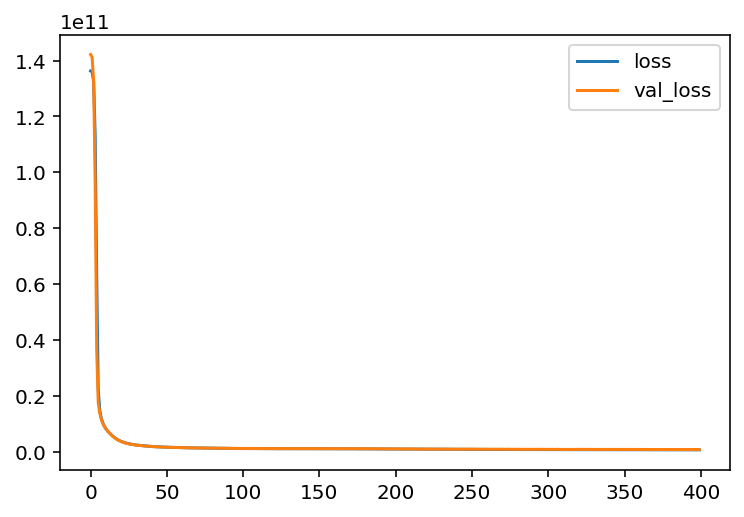

In [85]:
losses.plot()

# Evaluation on Test Data

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

In [86]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [87]:
predictions = model.predict(X_test)

In [88]:
mean_absolute_error(y_test,predictions)

17087.997572787113

In [89]:
np.sqrt(mean_squared_error(y_test,predictions))

27583.384742805196

In [90]:
explained_variance_score(y_test,predictions)

0.982920615106881

In [91]:
df_ml['average_price'].mean()

309027.29388902575

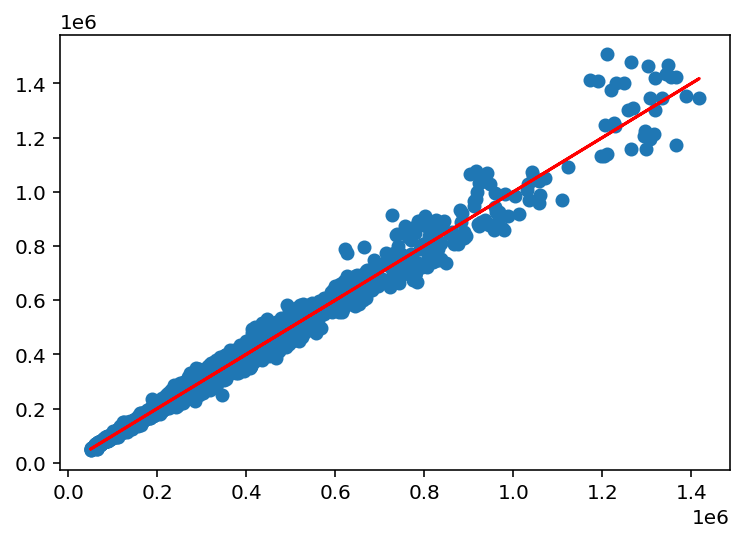

In [92]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [93]:
errors = y_test.values.reshape(3139, 1) - predictions

<AxesSubplot:ylabel='Density'>

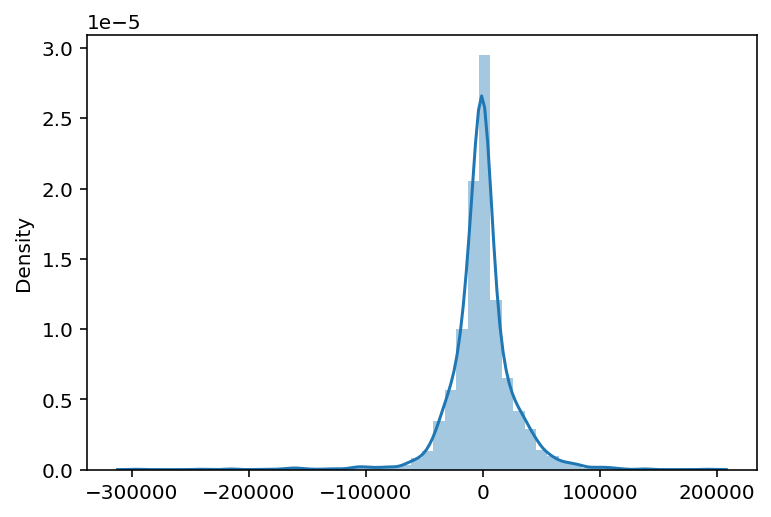

In [94]:
sns.distplot(errors)

### Predicting on a new area for new year

In [95]:
kingston_average = df_ml[(df_ml['area_Kingston upon Thames'] == 1) & (df_ml['year'] == 2020)]['houses_sold'].mean()

In [96]:
kingston_average

143.5

In [97]:
kingston_month = df_ml[(df_ml['area_Kingston upon Thames'] == 1)].drop('average_price',axis=1).iloc[-1]

In [98]:
kingston_month

houses_sold                    86.00
year                        2,021.00
month                           5.00
area_Barnet                     0.00
area_Bexley                     0.00
area_Brent                      0.00
area_Bromley                    0.00
area_Camden                     0.00
area_City of London             0.00
area_Croydon                    0.00
area_Ealing                     0.00
area_Enfield                    0.00
area_Greenwich                  0.00
area_Hackney                    0.00
area_Hammersmith & Fulham       0.00
area_Haringey                   0.00
area_Harrow                     0.00
area_Havering                   0.00
area_Hillingdon                 0.00
area_Hounslow                   0.00
area_Islington                  0.00
area_Kensington & Chelsea       0.00
area_Kingston upon Thames       1.00
area_Lambeth                    0.00
area_Lewisham                   0.00
area_Merton                     0.00
area_Newham                     0.00
a

In [99]:
kingston_month['houses_sold'] = round(kingston_average,0)

In [100]:
kingston_month['year'] = 2023

In [101]:
len(kingston_month)

35

In [102]:
kingston_month = scaler.transform(kingston_month.values.reshape(-1, 35))

In [103]:
kingston_month 

array([[-1.14735832,  1.99179391, -0.42533385, -0.17886968, -0.17559055,
        -0.17641535, -0.18289602, -0.17183585, -0.17351346, -0.17805487,
        -0.17351346, -0.17559055, -0.17968125, -0.17927587, -0.17517687,
        -0.16971821, -0.17600338, -0.17968125, -0.17267646, -0.17393063,
        -0.17517687, -0.17476233,  5.44389413, -0.17559055, -0.17805487,
        -0.17183585, -0.18801776, -0.17351346, -0.17559055, -0.18448507,
        -0.17559055, -0.17225661, -0.17968125, -0.18008584, -0.17559055]])

In [104]:
kingston_2023 = round(model.predict(kingston_month)[0][0],0)

In [105]:
kingston_2021 = round(df_ml[(df_ml['area_Kingston upon Thames'] == 1)].iloc[-1]['average_price'],0)

In [106]:
kingston_increase = kingston_2023 - kingston_2021

#### kingston House Prices

In [107]:
print("Actual: May 2021 prices £{:,}".format(kingston_2021))
print("Forecast: May 2023 prices are expected to be £{:,} in ".format(kingston_2023))
print("Forecast: increase £{:,}".format(kingston_increase))

Actual: May 2021 prices £504,304.0
Forecast: May 2023 prices are expected to be £581,926.0 in 
Forecast: increase £77,622.0
